In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from collections import Counter


### functions in use

In [178]:
def plot_boxplots(df, numeric_column):
    categorical_columns = ['gender', 'ethnicity', 'religion', 'mortality']
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    axs = axs.flatten()
    for i, cat_col in enumerate(categorical_columns):
        sns.boxplot(x=cat_col, y=numeric_column, data=df, ax=axs[i])
        axs[i].set_title(f'Boxplot of {numeric_column} by {cat_col}')
        axs[i].set_xlabel(cat_col)
        axs[i].set_ylabel(numeric_column)
        axs[i].tick_params(axis='x', rotation=45, labelsize=10)
    plt.tight_layout()
    plt.show()

def plot_correlation_heatmap(df, columns,method):
    correlation_data = df[columns].dropna()
    correlation_matrix = correlation_data.corr(method=method)
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Heatmap ({method.capitalize()} Method)')
    plt.show()
    
def plot_pie_chart(df, column_name):
    counts = df[column_name].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(counts))))
    plt.title(f'Distribution of {column_name.capitalize()}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

def plot_violin(df, x_col, y_col):
    plt.figure(figsize=(15, 10))
    sns.violinplot(x=x_col, y=y_col, data=df)
    plt.title(f'Violin Plot of {y_col} by {x_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

def plot_regplot(df, x_col, y_col):
    filtered_data = df.dropna(subset=[x_col, y_col])
    plt.figure(figsize=(10, 6))
    sns.regplot(data=filtered_data, x=x_col, y=y_col)
    plt.title(f'Relationship between {y_col} by {x_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

def plot_count(df, col):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

def plot_by_category(df, category_column, target_column):
    survival_data = df.groupby(category_column)[target_column].value_counts(normalize=True).unstack() * 100
    survival_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'red'])
    plt.title(f'{target_column} Percentages by {category_column}')
    plt.xlabel(category_column.capitalize())
    plt.ylabel('Percentage')
    plt.legend(title=target_column.capitalize(), labels=['0', '1'])
    plt.xticks(rotation=0)
    plt.show()
    
def plot_numeric_vs_categorical(data, numeric_column, categorical_column):
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=categorical_column, y=numeric_column, data=data)
    plt.title(f'Boxplot of {numeric_column} by {categorical_column}')
    plt.xlabel(categorical_column)
    plt.ylabel(numeric_column)
    plt.xticks(rotation=45) 
    plt.show()

def count_rows_with_empty_values(df, threshold):
    num_empty_values = df.isnull().sum(axis=1)
    rows_with_empty_values = (num_empty_values > threshold).sum()
    return rows_with_empty_values

def plot_histogram_with_kde(df, column_name):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=column_name, bins=30, kde=True)
    plt.title(f'Distribution of {column_name.capitalize()}')
    plt.xlabel(column_name.capitalize())
    plt.ylabel('Frequency')
    plt.show()
    
## בדיקת מובהקות קשר בין 2 משתנים מספריים
def t_test_mortality_numeric(data, numerical_column):
    died_values = data[data['mortality'] == 1][numerical_column]
    lived_values = data[data['mortality'] == 0][numerical_column]
    
    t_stat, p_value = ttest_ind(died_values, lived_values, equal_var=False)
    
    print(f"P-value for {numerical_column}: {p_value}")
    alpha = 0.05
    if p_value < alpha:
        print("The difference in values between those who died and those who lived is statistically significant.")
    else:
        print("The difference in values between those who died and those who lived is not statistically significant.")

## בדיקת מובהקות קשר בין 2 משתנים בינאריים
def chi_square_test(data, variable1, variable2):
    contingency_table = pd.crosstab(data[variable1], data[variable2])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    print(f"P-value: {p}")
    
    alpha = 0.05
    if p < alpha:
        print("There is a statistically significant association between the two variables.")
    else:
        print("There is no statistically significant association between the two variables.")


def plot_top_10_diagnoses_by_category(df, categorical_column):
    df['list_of_labels'] = df['list_of_labels'].apply(lambda x: eval(x) if isinstance(x, str) else x)
    diagnosis_data = df.explode('list_of_labels')
    diagnosis_counts = diagnosis_data.groupby([categorical_column, 'mortality', 'list_of_labels']).size().reset_index(name='count')
    top_10_diagnoses = diagnosis_data['list_of_labels'].value_counts().head(20).index.tolist()
    diagnosis_counts = diagnosis_counts[diagnosis_counts['list_of_labels'].isin(top_10_diagnoses)]
    pivot_table = diagnosis_counts.pivot_table(index='list_of_labels', columns=[categorical_column, 'mortality'], values='count', fill_value=0)
    pivot_table.plot(kind='bar', figsize=(14, 8))
    plt.xlabel('Diagnosis')
    plt.ylabel('Count')
    plt.title(f'Top 10 Most Common Diagnoses by {categorical_column}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
def plot_selected_diagnoses_for_men(df, categorical_column):
    # Filter the data to include only the selected symptoms
    selected_symptoms = ['Non Invasive Blood Pressure diastolic',
                         'Non Invasive Blood Pressure mean',
                         'Non Invasive Blood Pressure systolic']
    df['list_of_labels'] = df['list_of_labels'].apply(lambda x: eval(x) if isinstance(x, str) else x)
    diagnosis_data = df.explode('list_of_labels')
    diagnosis_counts = diagnosis_data.groupby([categorical_column, 'mortality', 'list_of_labels']).size().reset_index(name='count')
    diagnosis_counts = diagnosis_counts[(diagnosis_counts['list_of_labels'].isin(selected_symptoms)) & (diagnosis_counts[categorical_column] == 'M')]

    # Pivot the data for easier plotting
    pivot_table = diagnosis_counts.pivot_table(index='list_of_labels', columns='mortality', values='count', fill_value=0)

    # Plotting
    pivot_table.plot(kind='bar', figsize=(14, 8))
    plt.xlabel('Diagnosis')
    plt.ylabel('Count')
    plt.title(f'Selected Diagnoses for Men and Mortality')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.legend(['Alive', 'Deceased'], title='Mortality')
    plt.show()

#### Get the Data

In [3]:
import pandas as pd

def prepare_data():
    # Read CSV files into DataFrames
    admissions = pd.read_csv('ADMISSIONS.csv')
    patients = pd.read_csv('PATIENTS.csv')
    diagnoses_icd = pd.read_csv('DIAGNOSES_ICD.csv')
    icustays = pd.read_csv('ICUSTAYS.csv')
    chartevents = pd.read_csv('CHARTEVENTS.csv')
    d_items = pd.read_csv('D_ITEMS.csv')
    callout = pd.read_csv('CALLOUT.csv')
    d_labitems = pd.read_csv('D_LABITEMS.csv')

    # Merge icu_stays_patients and icu_admissions_info
    icu_stays_patients = icustays['subject_id'].unique()
    icu_admissions_info = admissions[admissions['hadm_id'].isin(icustays['hadm_id'])]
    icu_patients_info = patients[patients['subject_id'].isin(icustays['subject_id'])]
    demographics = icu_patients_info[['subject_id', 'gender', 'dob']]
    demographics = demographics.merge(icu_admissions_info[['subject_id', 'admittime', 'ethnicity', 'religion']], on='subject_id')
    demographics['age'] = (pd.to_datetime(demographics['admittime']).dt.year - pd.to_datetime(demographics['dob']).dt.year)
    demographics.drop(columns=['dob', 'admittime'], inplace=True)

    # Merge chartevents with d_items to get labels
    chartevents = chartevents.merge(d_items[['itemid', 'label']], left_on='itemid', right_on='itemid', how='left')

    # Group labels by subject_id and create a list of diagnoses for each patient
    result = chartevents.groupby('subject_id')['label'].apply(list).reset_index()
    result.columns = ['subject_id', 'list_of_labels']

    # Calculate mean values for bp and pulse
    bp_itemids = [51, 455, 220052]
    pulse_itemids = [211, 220045]
    bp = chartevents[chartevents['itemid'].isin(bp_itemids)]
    pulse = chartevents[chartevents['itemid'].isin(pulse_itemids)]
    bp['valuenum'] = pd.to_numeric(bp['valuenum'], errors='coerce')
    pulse['valuenum'] = pd.to_numeric(pulse['valuenum'], errors='coerce')
    bp_mean = bp.groupby('subject_id').agg({'valuenum': 'mean'}).reset_index()
    pulse_mean = pulse.groupby('subject_id').agg({'valuenum': 'mean'}).reset_index()

    # Rename columns for clarity
    bp_mean.rename(columns={'valuenum': 'bp_mean'}, inplace=True)
    pulse_mean.rename(columns={'valuenum': 'pulse_mean'}, inplace=True)

    # Create is_infected column from callout data
    callout['is_infected'] = (callout[['request_tele', 'request_resp', 'request_cdiff', 'request_mrsa', 'request_vre']] == 1).any(axis=1).astype(int)
    is_infected = callout[['subject_id', 'is_infected']].drop_duplicates()

    # Merge all data into a single DataFrame
    data = demographics[['subject_id', 'gender', 'age', 'ethnicity', 'religion']]
    data = data.merge(is_infected, on='subject_id', how='left')
    data['is_infected'].fillna(0, inplace=True)
    data = data.merge(bp_mean, on='subject_id', how='left')
    data = data.merge(pulse_mean, on='subject_id', how='left')
    data = data.merge(icu_admissions_info[['subject_id', 'hospital_expire_flag']], on='subject_id', how='left')
    data.rename(columns={'hospital_expire_flag': 'mortality'}, inplace=True)

    # Merge the list of labels into the final data
    data = data.merge(result, on='subject_id', how='left')

    # Ensure subject_id is of integer type
    data['subject_id'] = data['subject_id'].astype(int)

    # Handle duplicate subject_ids and mortality
    data = data.groupby('subject_id').agg({
        'gender': 'first',
        'age': 'first',
        'ethnicity': 'first',
        'religion': 'first',
        'is_infected': 'first',
        'bp_mean': 'mean',
        'pulse_mean': 'mean',
        'mortality': 'max',
        'list_of_labels': 'first'
    }).reset_index()

    return data

all_patients_data = prepare_data()

<ipython-input-3-f944a7842bab>:9: DtypeWarning: Columns (8,10,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  chartevents = pd.read_csv('CHARTEVENTS.csv')
<ipython-input-3-f944a7842bab>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bp['valuenum'] = pd.to_numeric(bp['valuenum'], errors='coerce')
<ipython-input-3-f944a7842bab>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pulse['valuenum'] = pd.to_numeric(pulse['valuenum'], errors='coerce')


In [4]:
all_patients_data.head()

,subject_id,gender,age,ethnicity,religion,is_infected,bp_mean,pulse_mean,mortality,list_of_labels
0,10006,F,70,BLACK/AFRICAN AMERICAN,CATHOLIC,0.0,122.388889,82.000000,0,"[BSA, Admit Wt, Allergy 1, Diagnosis/op, Servi..."
1,10011,F,36,UNKNOWN/NOT SPECIFIED,CATHOLIC,0.0,110.829787,82.398649,1,"[Abdominal Assessment, Activity, Activity Tole..."
2,10013,F,87,UNKNOWN/NOT SPECIFIED,CATHOLIC,0.0,102.356322,92.146341,1,"[Heart Rate, NBP Mean, Respiratory Rate, SpO2,..."
3,10017,F,74,WHITE,CATHOLIC,1.0,113.236842,91.836735,0,"[Abdominal Assessment, Activity, Behavior, Bow..."
4,10019,M,49,WHITE,CATHOLIC,0.0,83.098039,83.333333,1,"[Airway Size, Airway Type, Apnea Time Interval..."


In [5]:
all_patients_data.shape

(100, 10)

In [6]:
all_patients_data.columns

Index(['subject_id', 'gender', 'age', 'ethnicity', 'religion', 'is_infected',
       'bp_mean', 'pulse_mean', 'mortality', 'list_of_labels'],
      dtype='object')

In [7]:
all_patients_data.isnull().sum().sort_values()

subject_id         0
gender             0
age                0
ethnicity          0
is_infected        0
mortality          0
religion           1
list_of_labels     1
pulse_mean         2
bp_mean           31
dtype: int64

# **--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# **Data Preprocessing**
<ul>
<li>missing values</li>
<li>outliers</li>
<li>EDA</li>
</ul>

# **--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## **missing values**

#### We built a function whose purpose is to check the sparsity of the data, the function shows the amount of rows that contain more than N empty values

In [8]:
rows_with_empty = count_rows_with_empty_values(all_patients_data, threshold=3)
print(f"Number of rows with more than 3 empty values: {rows_with_empty}")

Number of rows with more than 3 empty values: 0


In [9]:
all_patients_data = all_patients_data[all_patients_data.isnull().sum(axis=1) <= 3]

### <blockquote> list_of_labels </blockquote>

In [10]:
missing_bp_mean = all_patients_data['list_of_labels'].isnull().sum()
print(f'Number of missing values in list_of_labels: {missing_bp_mean}')

Number of missing values in list_of_labels: 1


In [11]:
all_patients_data = all_patients_data.dropna(subset=['list_of_labels'])

### <blockquote> pulse_mean </blockquote>

In [12]:
missing_bp_mean = all_patients_data['pulse_mean'].isnull().sum()
print(f'Number of missing values in pulse_mean: {missing_bp_mean}')

Number of missing values in pulse_mean: 1


In [13]:
all_patients_data = all_patients_data.dropna(subset=['pulse_mean'])

### <blockquote> bp_mean </blockquote>

In [14]:
missing_bp_mean = all_patients_data['bp_mean'].isnull().sum()
print(f'Number of missing values in bp_mean: {missing_bp_mean}')

Number of missing values in bp_mean: 29


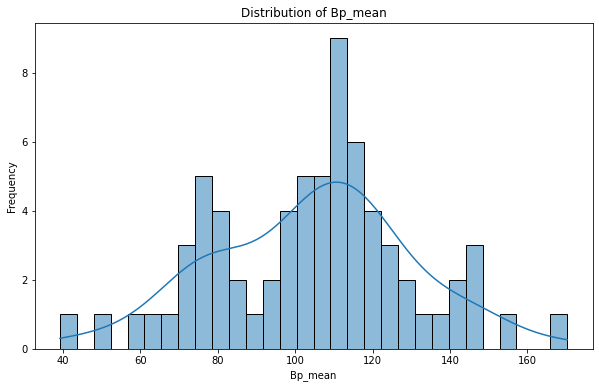

In [15]:
plot_histogram_with_kde(all_patients_data, 'bp_mean')

In [16]:
all_patients_data[['bp_mean']].describe()

,bp_mean
count,69.000000
mean,104.574449
std,25.524195
min,39.217391
25%,83.098039
50%,107.061728
75%,118.412698
max,170.323308


In [17]:
all_patients_data['bp_mean'].median()

107.06172839506173

In [18]:
all_patients_data['bp_mean'].fillna(all_patients_data['bp_mean'].mean(), inplace=True)

### <blockquote> religion </blockquote>

In [19]:
missing_bp_mean = all_patients_data['religion'].isnull().sum()
print(f'Number of missing values in religion: {missing_bp_mean}')

Number of missing values in religion: 1


In [20]:
all_patients_data = all_patients_data.dropna(subset=['religion'])

In [21]:
all_patients_data.isnull().sum().sort_values()

subject_id        0
gender            0
age               0
ethnicity         0
religion          0
is_infected       0
bp_mean           0
pulse_mean        0
mortality         0
list_of_labels    0
dtype: int64

# **--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# **outliers**

### We will examine abnormal values in each numerical column separately before diving into a deeper analysis

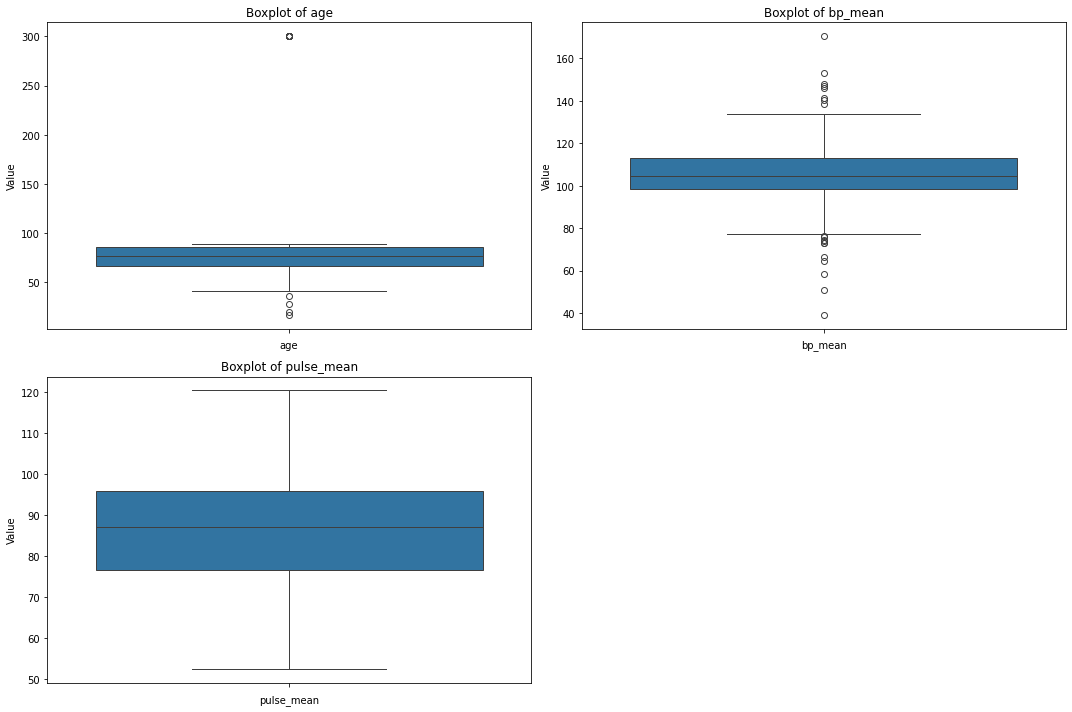

In [22]:
columns_to_plot = ['age', 'bp_mean', 'pulse_mean']
num_columns = len(columns_to_plot)
num_rows = (num_columns + 1) // 2 
plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(columns_to_plot):
    plt.subplot(num_rows, 2, i + 1)
    sns.boxplot(data=all_patients_data, y=column)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Value')
plt.tight_layout()
plt.show()

### We will examine each column individually before continuing the analysis to see if the outliers need to be addressed

## <blockquote> age </blockquote>

In [23]:
all_patients_data[['age']].describe()

,age
count,97.000000
mean,90.123711
std,65.067154
min,17.000000
25%,67.000000
50%,77.000000
75%,86.000000
max,300.000000


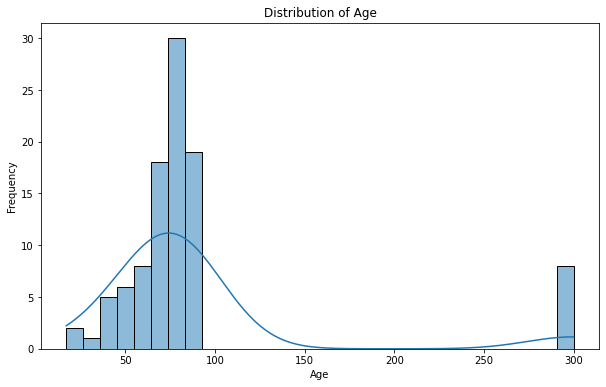

In [24]:
plot_histogram_with_kde(all_patients_data, 'age')

#### we can see that the maximum age is 300, we will show all patients who are over 100 years old to check if they are outliers or anomalous

In [25]:
all_patients_data[all_patients_data['age'] > 100]

,subject_id,gender,age,ethnicity,religion,is_infected,bp_mean,pulse_mean,mortality,list_of_labels
5,10026,F,300,WHITE,OTHER,1.0,146.712329,70.273973,0,"[BSA, Admit Wt, Allergy 1, Diagnosis/op, Servi..."
11,10036,F,300,WHITE,JEWISH,0.0,100.483871,78.571429,1,"[BUN (6-20), Calcium (8.4-10.2), Carbon Dioxid..."
33,10094,M,300,BLACK/AFRICAN AMERICAN,UNOBTAINABLE,0.0,101.975000,74.866337,1,"[Abdominal Assessment, Activity, Activity Tole..."
62,40655,F,300,WHITE,JEWISH,1.0,104.574449,52.470588,0,"[Non Invasive Blood Pressure systolic, Non Inv..."
67,41983,F,300,WHITE,UNOBTAINABLE,0.0,104.574449,87.844444,1,"[Heart Rate, Heart rate Alarm - High, Heart Ra..."
83,42458,M,300,WHITE,JEWISH,0.0,104.574449,85.782609,0,"[PH (dipstick), Specific Gravity (urine), Non ..."
89,43827,F,300,UNKNOWN/NOT SPECIFIED,CATHOLIC,1.0,112.666667,79.107143,0,"[Heart Rate, Respiratory Rate, O2 saturation p..."
96,44154,M,300,WHITE,PROTESTANT QUAKER,0.0,74.043478,73.437500,1,"[Heart Rate, Respiratory Rate, O2 saturation p..."


In [26]:
len(all_patients_data[all_patients_data['age'] > 100])

8

In [27]:
all_patients_data.loc[all_patients_data['age'] > 100, 'age'] = 90

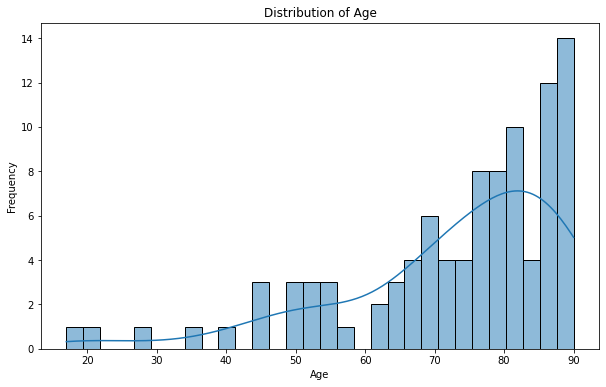

In [28]:
plot_histogram_with_kde(all_patients_data, 'age')

#### We can see that most of the patients who come to intensive care are in the 60-80 range. We chose not to remove abnormal data below the age of 25 because we would like to investigate whether there are certain phenomena that characterize those ages in the sequel.

## <blockquote> bp_mean </blockquote>

In [29]:
all_patients_data[['bp_mean']].describe()

,bp_mean
count,97.000000
mean,104.459469
std,21.451319
min,39.217391
25%,98.571429
50%,104.574449
75%,112.844444
max,170.323308


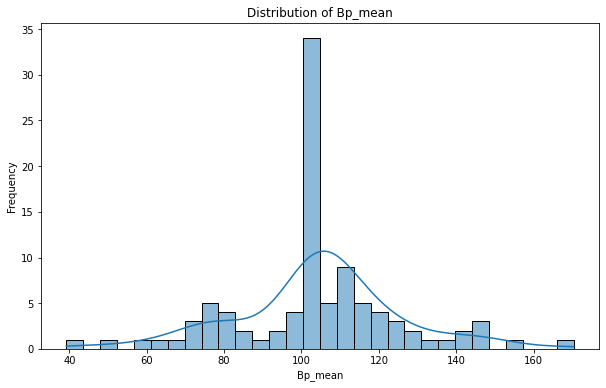

In [30]:
plot_histogram_with_kde(all_patients_data, 'bp_mean')

#### It can be seen that there are very common center values ​​(the 100 area). We chose not to remove the extreme values ​​in order to investigate whether there are phenomena that could have caused them or whether they themselves characterize certain phenomena.

## <blockquote> pulse_mean </blockquote>

In [31]:
all_patients_data[['pulse_mean']].describe()

,pulse_mean
count,97.000000
mean,86.661176
std,14.871994
min,52.470588
25%,76.681818
50%,87.050000
75%,95.796610
max,120.394737


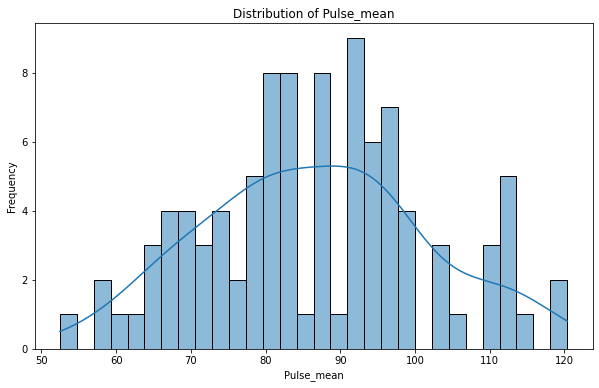

In [32]:
plot_histogram_with_kde(all_patients_data, 'pulse_mean')

# **--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# **EDA**

### Note - choose which method to use according to the distribution of the data. pearson for Gaussian distribution and spearman or kendall tau for the other distributions.

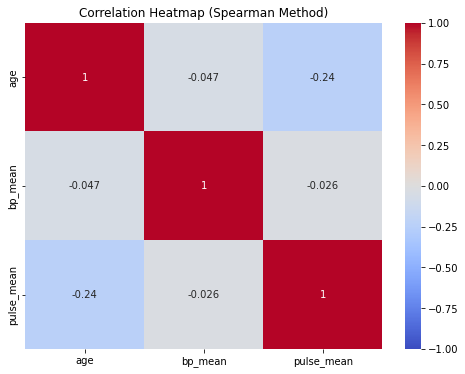

In [33]:
plot_correlation_heatmap(all_patients_data, ['age','bp_mean', 'pulse_mean'],'spearman')

### There is no clear relationship between the numerical columns.

### We'll examine each column in turn, , and search for a distinct correlation with the goal variable (mortality). We will attempt to conduct a thorough investigation if such a relationship is discovered.

## <blockquote> mortality </blockquote>

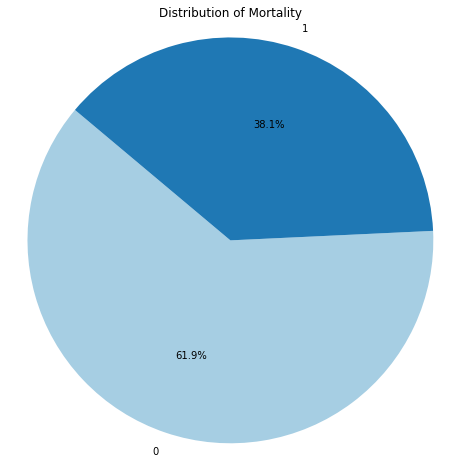

In [34]:
plot_pie_chart(all_patients_data, 'mortality')

In [35]:
all_patients_data.groupby('mortality')[['mortality']].count()

,mortality
mortality,
0,60
1,37


## <blockquote> gender </blockquote>

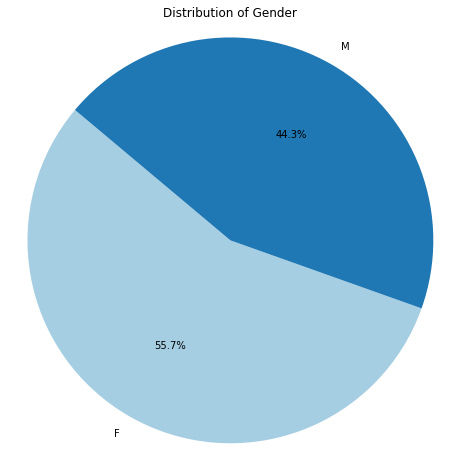

In [36]:
plot_pie_chart(all_patients_data, 'gender')

In [37]:
all_patients_data.groupby('gender')[['gender']].count()

,gender
gender,
F,54
M,43


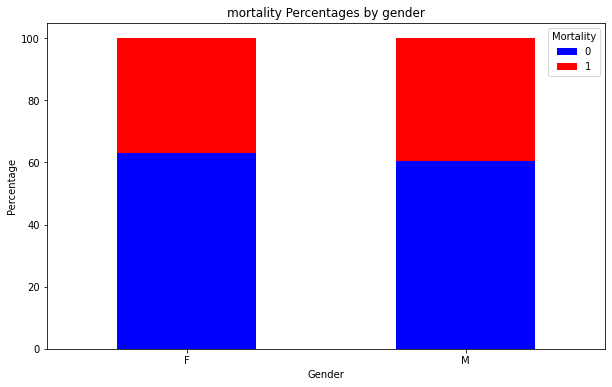

In [38]:
plot_by_category(all_patients_data, 'gender', 'mortality')

In [39]:
chi_square_test(all_patients_data, 'gender', 'mortality')

P-value: 0.9671285373528751
There is no statistically significant association between the two variables.


## <blockquote> is_infected </blockquote>
#### represents whether the patient was infected with an immune bacterium.

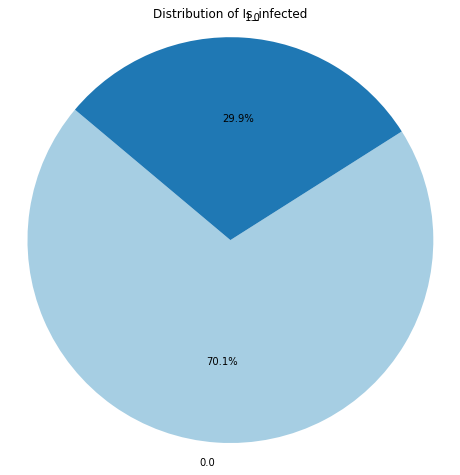

In [40]:
plot_pie_chart(all_patients_data, 'is_infected')

In [41]:
all_patients_data.groupby('is_infected')[['is_infected']].count()

,is_infected
is_infected,
0.0,68
1.0,29


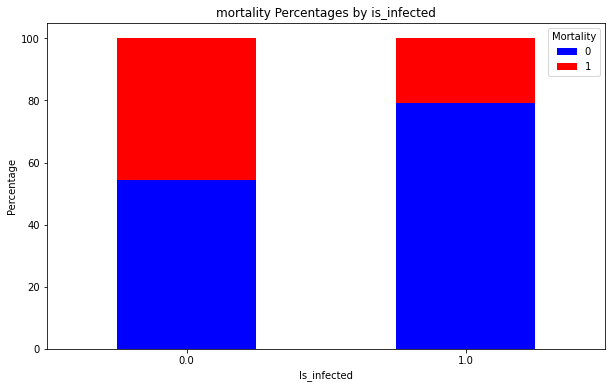

In [42]:
plot_by_category(all_patients_data,  'is_infected', 'mortality')

In [43]:
chi_square_test(all_patients_data, 'mortality','is_infected')

P-value: 0.03725999871460757
There is a statistically significant association between the two variables.


---
> # Conclusion 1.1 :
> #### It can be seen that the mortality rates of women treated in intensive care are similar to those of men treated in intensive care, so that **gender has no direct effect on mortality** (according to a chi-square test).

> #### Surprisingly, it can be seen that the majority of patients infected with an immune bacterium ('is_infected' = 1) survive treatment in the intensive care unit at a higher percentage than patients who were not infected with an immune bacterium, so that **infection with an immune bacterium ('is_infected') has an direct effect on mortality** (according to a chi-square test).
---


## <blockquote> age </blockquote>

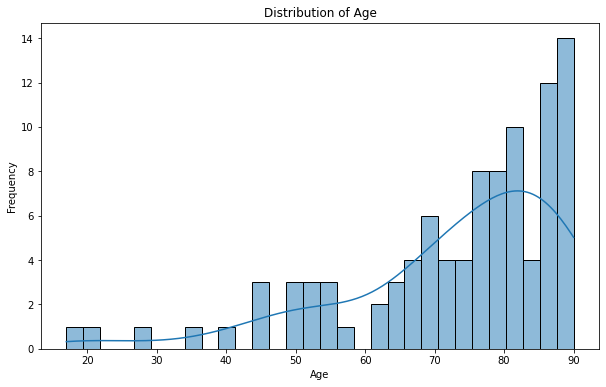

In [44]:
plot_histogram_with_kde(all_patients_data, 'age')

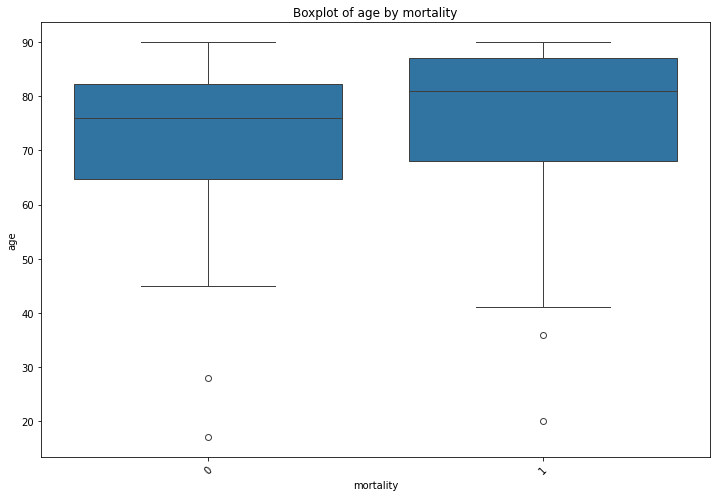

In [45]:
plot_numeric_vs_categorical(all_patients_data, 'age', 'mortality')

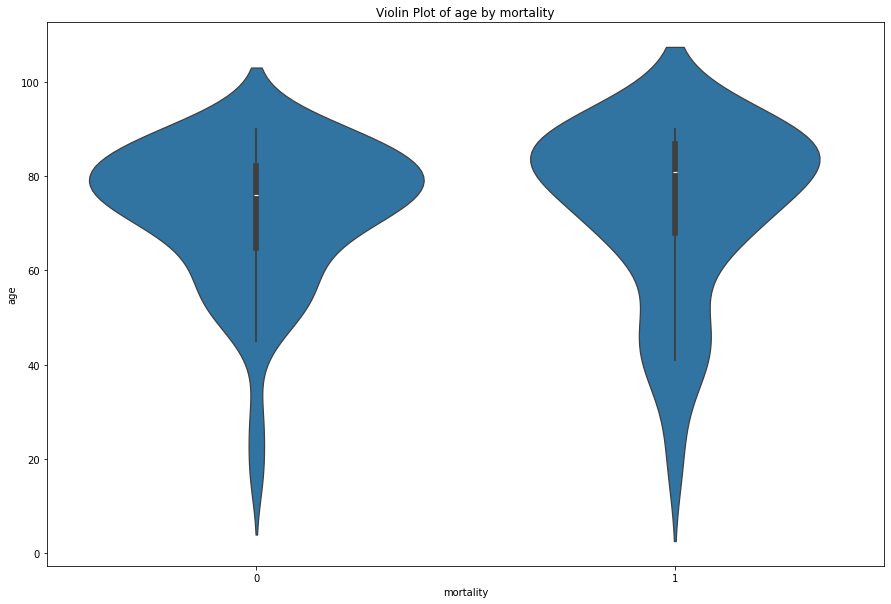

In [46]:
plot_violin(all_patients_data, 'mortality', 'age')

In [47]:
t_test_mortality_numeric(all_patients_data,'age')

P-value for age: 0.7941458899708309
The difference in values between those who died and those who lived is not statistically significant.


---
> # Conclusion 1.2 :
> #### It can be seen that there is no significant difference between the ages of patients who survive treatment in the ward and patients who do not survive (according to the T-test).
> #### Therefore it can be said that **there is no significant effect between age and mortality.**
---

## <blockquote> pulse_mean </blockquote>

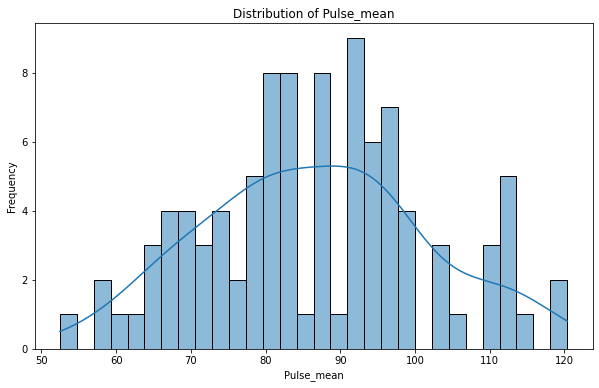

In [48]:
plot_histogram_with_kde(all_patients_data, 'pulse_mean')

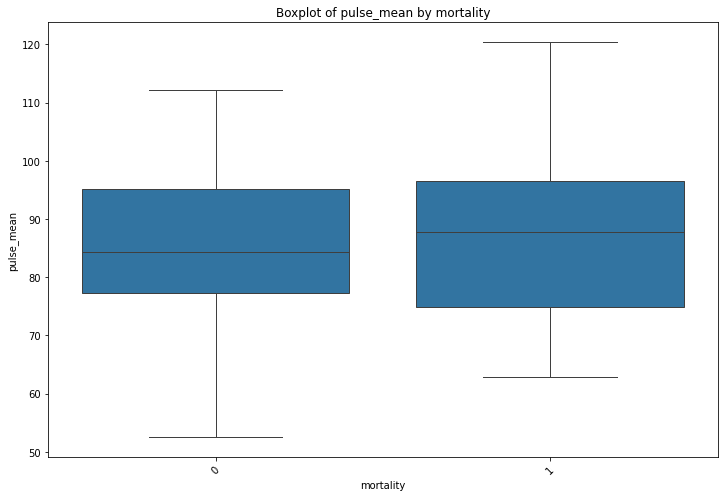

In [49]:
plot_numeric_vs_categorical(all_patients_data, 'pulse_mean', 'mortality')

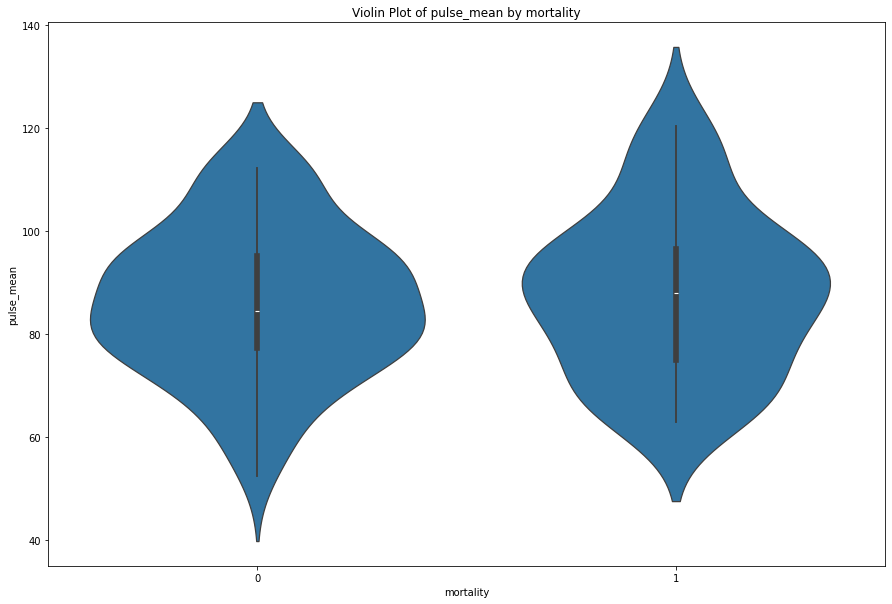

In [50]:
plot_violin(all_patients_data, 'mortality', 'pulse_mean')

In [51]:
t_test_mortality_numeric(all_patients_data,'pulse_mean')

P-value for pulse_mean: 0.5863691109319766
The difference in values between those who died and those who lived is not statistically significant.


---
> # Conclusion 1.3 :
> #### It can be seen that there is no significant difference between the pulse of patients who survive treatment in the ward and patients who do not survive (according to the T-test).
> #### Therefore it can be said that **there is no significant effect between pulse and mortality.**
---


## <blockquote> bp_mean </blockquote>

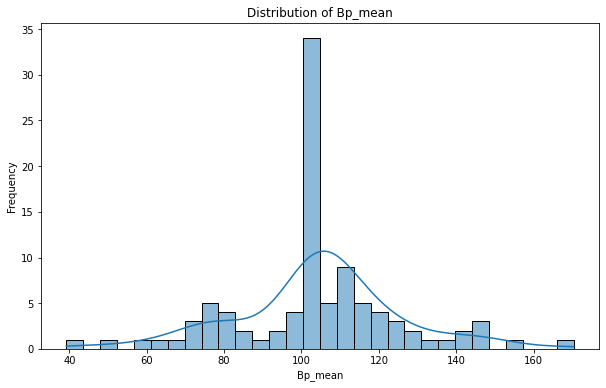

In [52]:
plot_histogram_with_kde(all_patients_data, 'bp_mean')

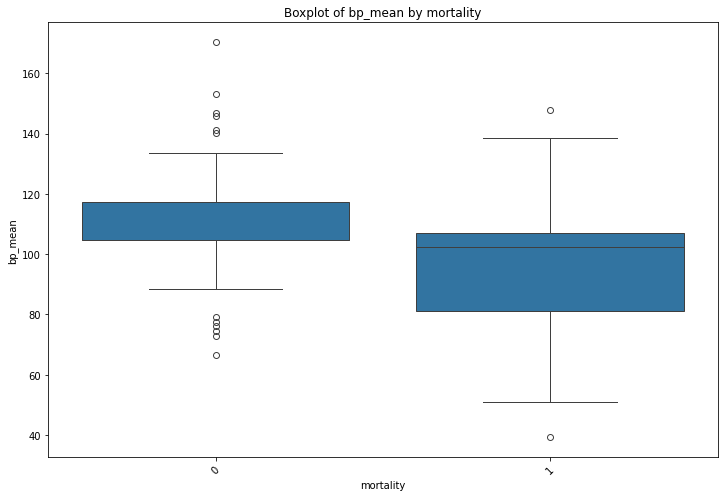

In [53]:
plot_numeric_vs_categorical(all_patients_data, 'bp_mean', 'mortality')

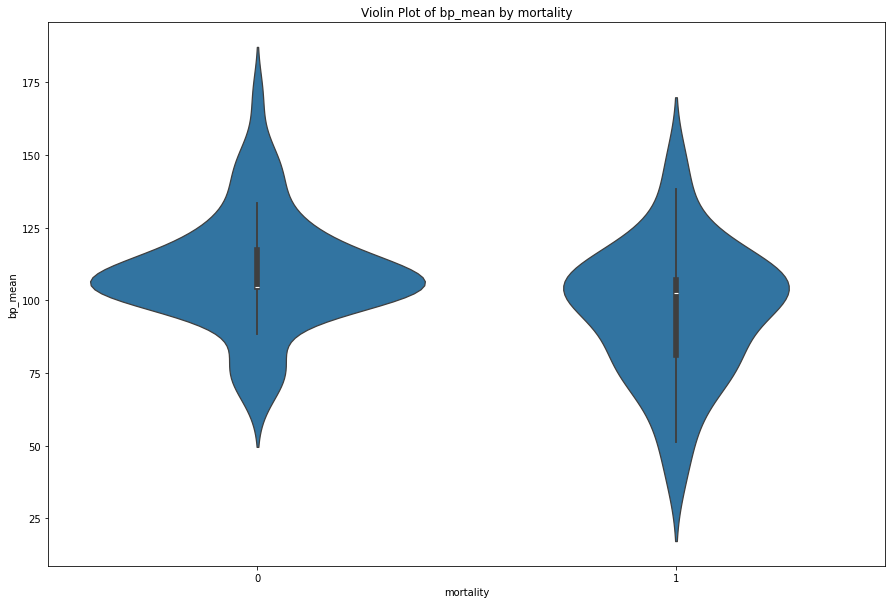

In [54]:
plot_violin(all_patients_data, 'mortality', 'bp_mean')

In [55]:
t_test_mortality_numeric(all_patients_data,'bp_mean')

P-value for bp_mean: 0.00399135585779228
The difference in values between those who died and those who lived is statistically significant.


In [56]:
died_values = all_patients_data[all_patients_data['mortality'] == 1]['bp_mean']
lived_values = all_patients_data[all_patients_data['mortality'] == 0]['bp_mean']

In [57]:
died_values.describe()

count     37.000000
mean      96.205998
std       22.699814
min       39.217391
25%       81.270642
50%      102.356322
75%      107.061728
max      147.803419
Name: bp_mean, dtype: float64

In [58]:
lived_values.describe()

count     60.000000
mean     109.549109
std       19.111821
min       66.430295
25%      104.574449
50%      104.574449
75%      117.237399
max      170.323308
Name: bp_mean, dtype: float64

---
> # Conclusion 1.4:
> #### It can be seen that there is a significant difference between the blood pressure of patients who survive treatment in the ward and patients who do not survive (according to the T test).
> #### Therefore it can be said that **there is a significant effect between blood pressure and mortality.**
> #### **Patients who survive the treatment have higher blood pressure** (both on average and in terms of extreme values).
---

### Since it turned out that there is a clear effect between the blood pressure and mortality, we will check whether dividing by gender can sharpen the effect between them.

In [59]:
female_patients_data = all_patients_data[all_patients_data['gender'] == 'F']
male_patients_data = all_patients_data[all_patients_data['gender'] == 'M']

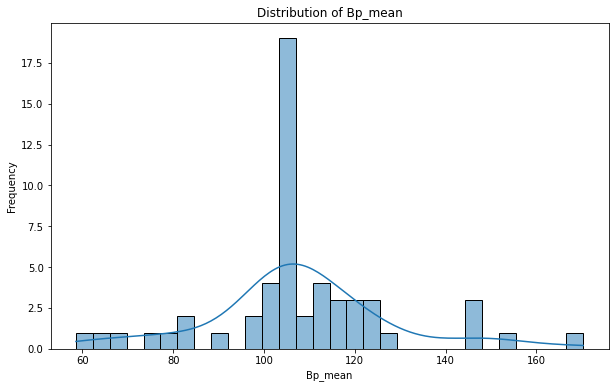

In [60]:
plot_histogram_with_kde(female_patients_data, 'bp_mean')

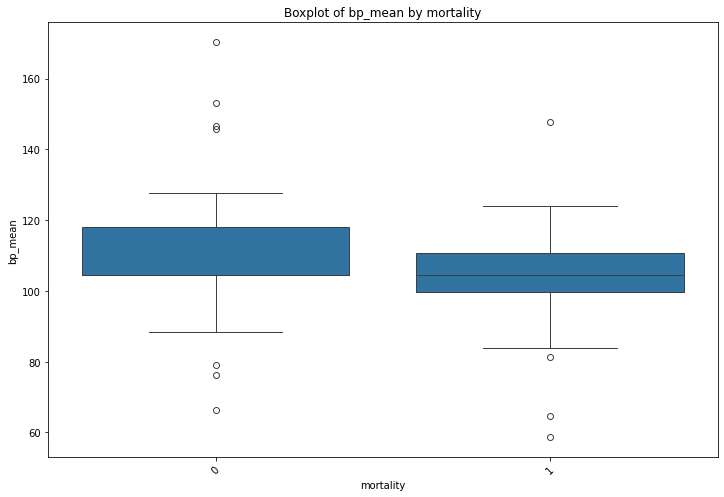

In [61]:
plot_numeric_vs_categorical(female_patients_data, 'bp_mean', 'mortality')

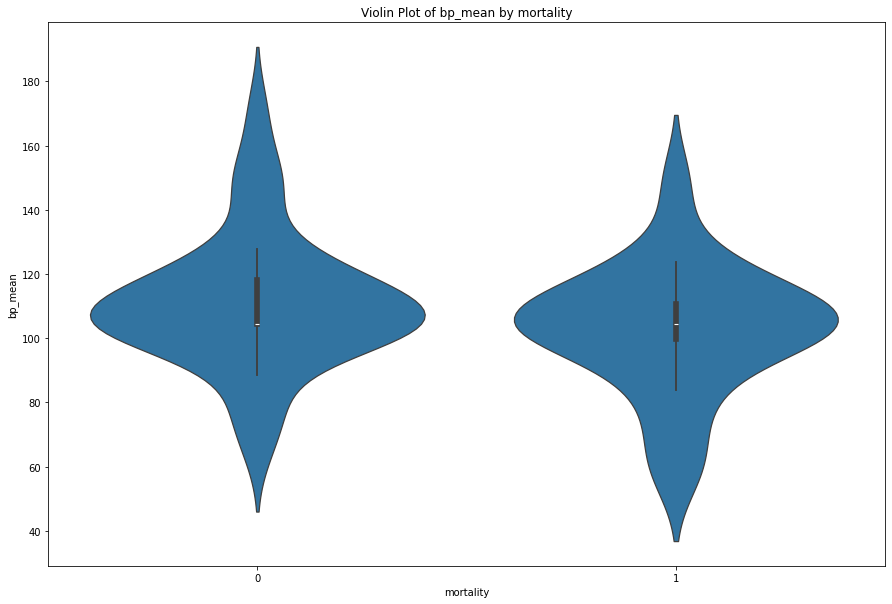

In [62]:
plot_violin(female_patients_data, 'mortality', 'bp_mean')


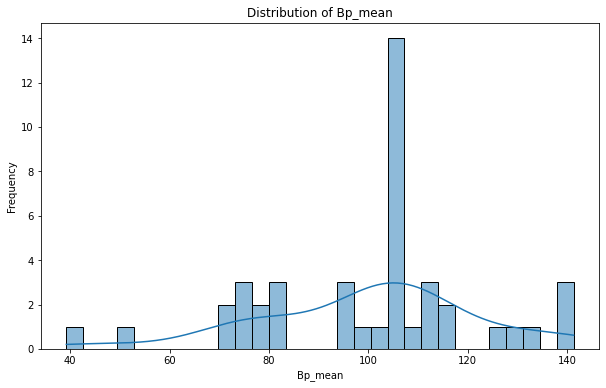

In [63]:
plot_histogram_with_kde(male_patients_data, 'bp_mean')

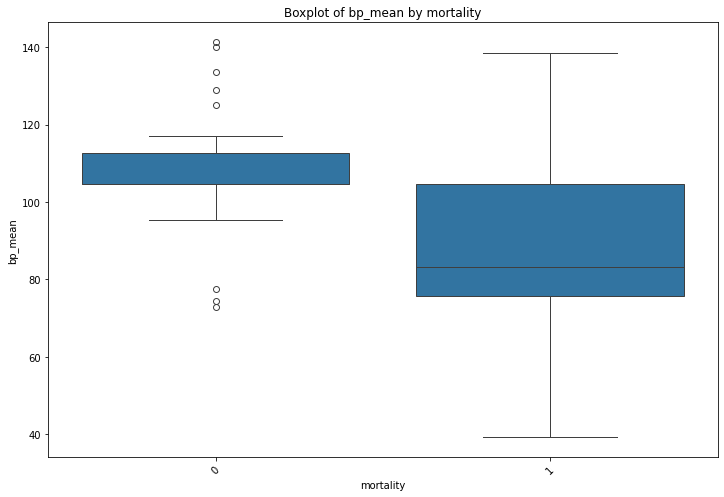

In [64]:
plot_numeric_vs_categorical(male_patients_data, 'bp_mean', 'mortality')

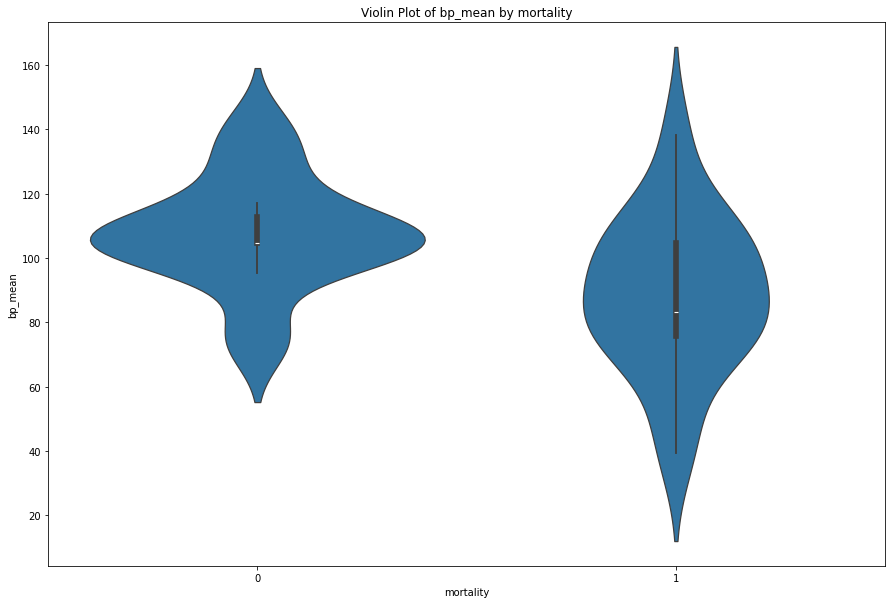

In [65]:
plot_violin(male_patients_data, 'mortality','bp_mean')

#### males patients

In [66]:
t_test_mortality_numeric(male_patients_data,'bp_mean')

P-value for bp_mean: 0.008334420534938844
The difference in values between those who died and those who lived is statistically significant.


#### females patients

In [67]:
t_test_mortality_numeric(female_patients_data,'bp_mean')

P-value for bp_mean: 0.15422252390096816
The difference in values between those who died and those who lived is not statistically significant.


---
> # Conclusion 1.4.2:
> #### After dividing into males and females, we were able to refine conclusion 1.4 and say that **blood pressure has a significant effect on mortality if the gender of the patient is male.**
> #### **If the patient is female, blood pressure has no significant effect on mortality.**
---


### We will also examine how blood pressure affects mortality according to infection with an immune virus (is_infected)

In [68]:
infected_patients_data = all_patients_data[all_patients_data['is_infected'] == 1]
uninfected_patients_data = all_patients_data[all_patients_data['is_infected'] == 0]

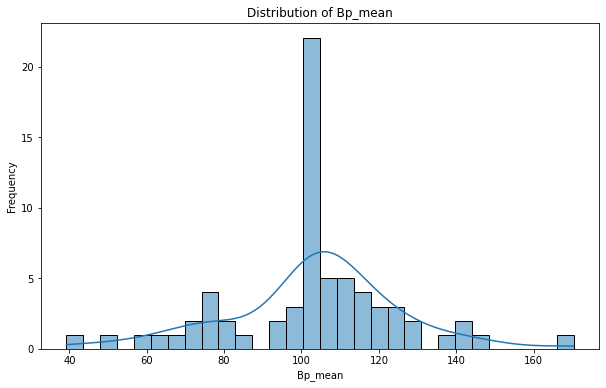

In [69]:
plot_histogram_with_kde(uninfected_patients_data, 'bp_mean')

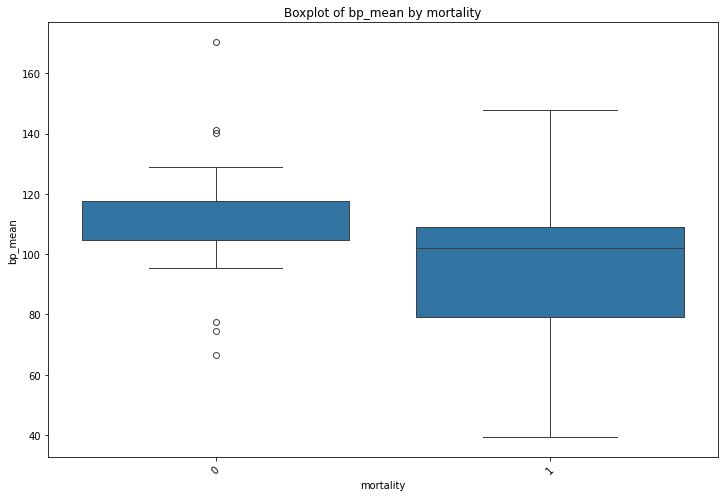

In [70]:
plot_numeric_vs_categorical(uninfected_patients_data, 'bp_mean', 'mortality')

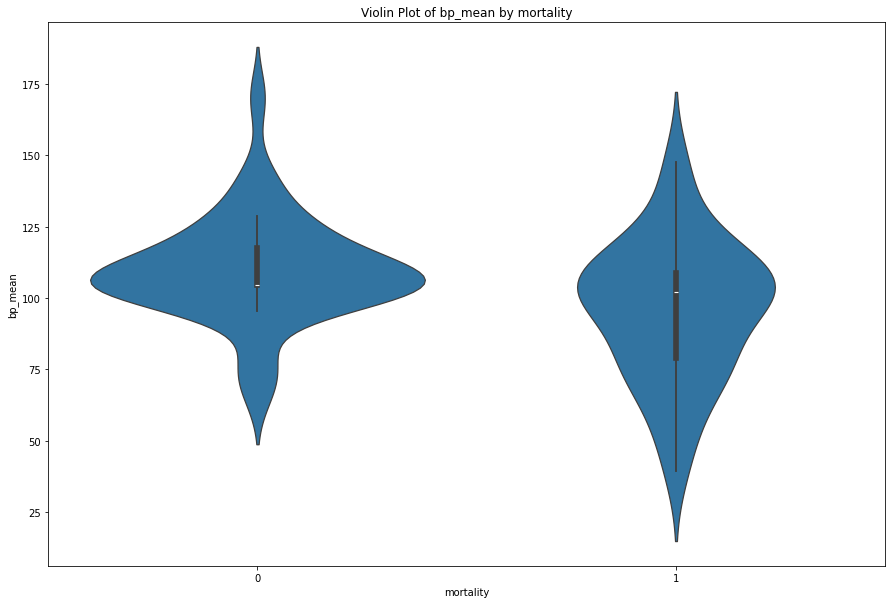

In [71]:
plot_violin(uninfected_patients_data, 'mortality','bp_mean')

In [72]:
t_test_mortality_numeric(uninfected_patients_data,'bp_mean')

P-value for bp_mean: 0.011106146909107264
The difference in values between those who died and those who lived is statistically significant.


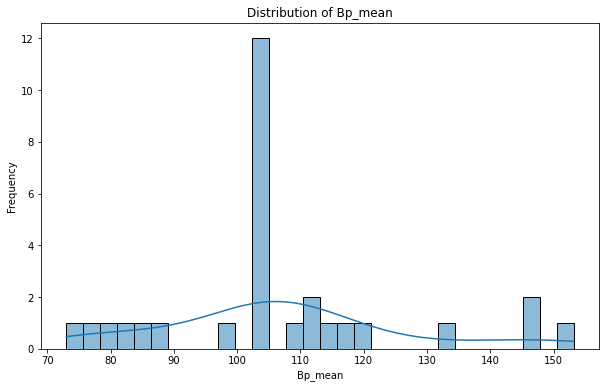

In [73]:
plot_histogram_with_kde(infected_patients_data, 'bp_mean')

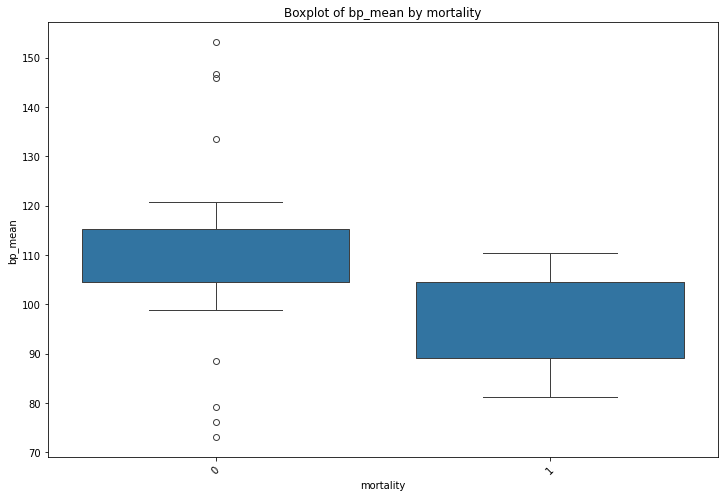

In [74]:
plot_numeric_vs_categorical(infected_patients_data, 'bp_mean', 'mortality')

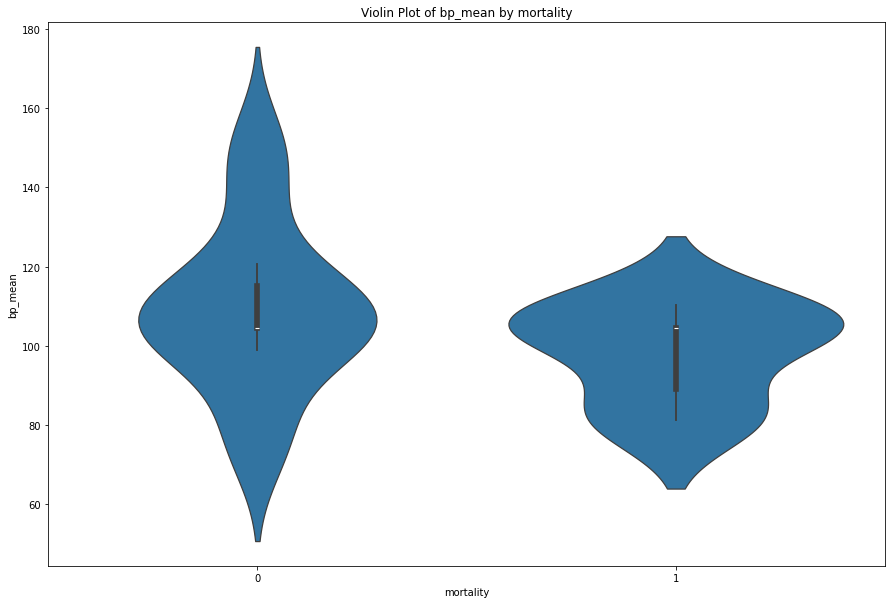

In [75]:
plot_violin(infected_patients_data, 'mortality','bp_mean')

In [76]:
t_test_mortality_numeric(infected_patients_data,'bp_mean')

P-value for bp_mean: 0.12088505035219031
The difference in values between those who died and those who lived is not statistically significant.


### It can be seen that there is a **significant effect between blood pressure and mortality for patients who were not infected with a resistant bacteria** (T-test), we will check if the effect varies by gender to refine the conclusion.

In [77]:
female_patients_data = uninfected_patients_data[uninfected_patients_data['gender'] == 'F']
male_patients_data = uninfected_patients_data[uninfected_patients_data['gender'] == 'M']

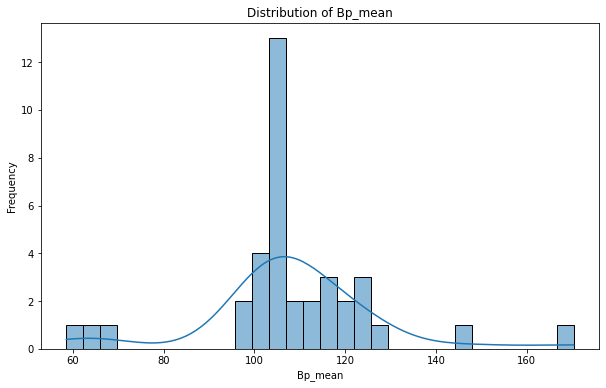

In [78]:
plot_histogram_with_kde(female_patients_data, 'bp_mean')

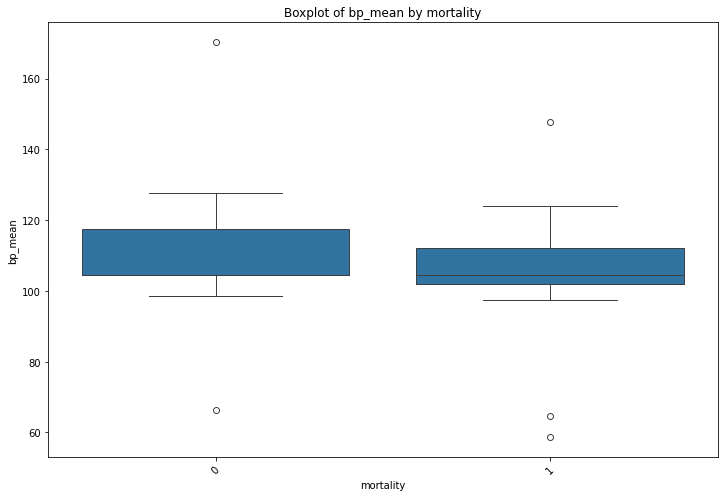

In [79]:
plot_numeric_vs_categorical(female_patients_data, 'bp_mean', 'mortality')

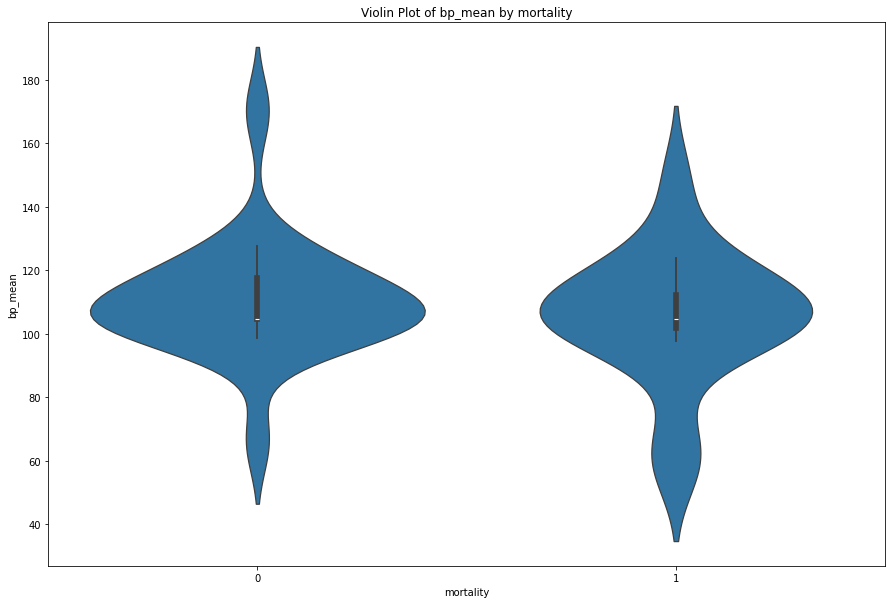

In [80]:
plot_violin(female_patients_data, 'mortality', 'bp_mean')

In [81]:
t_test_mortality_numeric(female_patients_data,'bp_mean')

P-value for bp_mean: 0.42056529622260197
The difference in values between those who died and those who lived is not statistically significant.


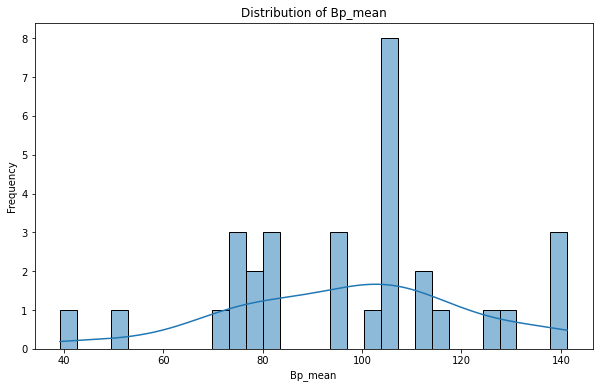

In [82]:
plot_histogram_with_kde(male_patients_data, 'bp_mean')

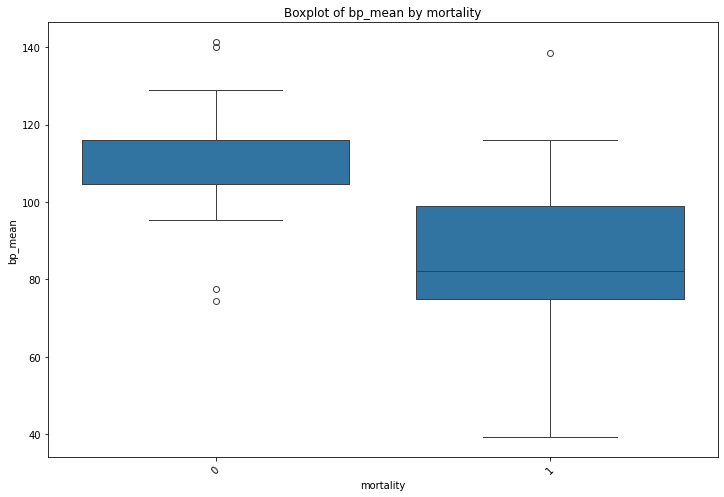

In [83]:
plot_numeric_vs_categorical(male_patients_data, 'bp_mean', 'mortality')

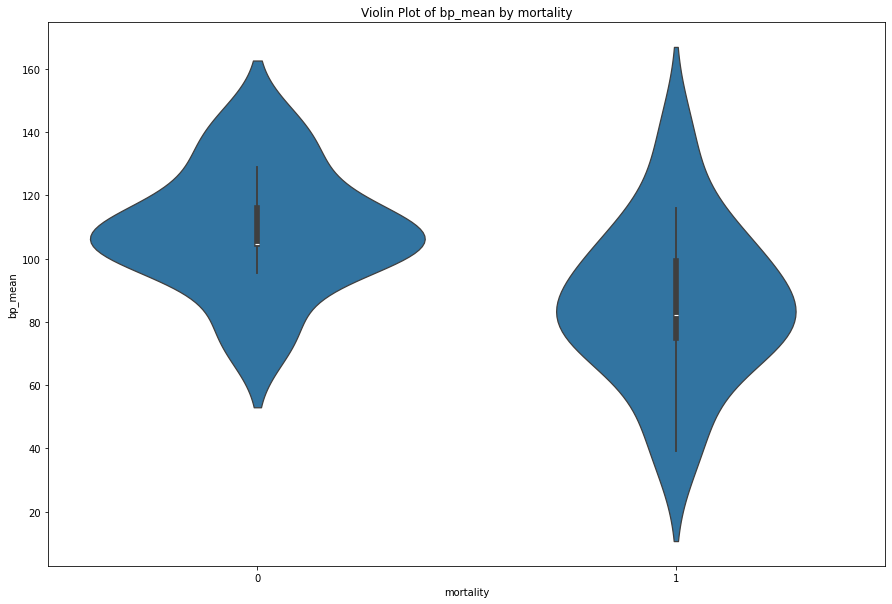

In [84]:
plot_violin(male_patients_data, 'mortality', 'bp_mean')

In [85]:
t_test_mortality_numeric(male_patients_data,'bp_mean')

P-value for bp_mean: 0.007190735628360813
The difference in values between those who died and those who lived is statistically significant.


---
> # Conclusion 1.4.3:
> #### Further to conclusion 1.4, we showed that **blood pressure has a significant effect on mortality only if the patient is not infected with an immune virus ('is_infected' = 0)**.

> #### Then, similar to conclusion 1.4.2, we tried to deepen the conclusion according to gender and showed that **if the patient is male (gender = "M") who is not infected with an immune virus ('is_infected = 0) blood pressure has a significant effect on mortality** (Patients who meet the criteria with higher blood pressure will survive with a higher chance).
---


## <blockquote> religion </blockquote>

### Since we understood that blood pressure in certain cases has a significant effect on mortality, we will examine blood pressure

In [86]:
all_patients_data['religion'].value_counts()

CATHOLIC               39
NOT SPECIFIED          15
UNOBTAINABLE           15
PROTESTANT QUAKER      10
JEWISH                  9
OTHER                   3
CHRISTIAN SCIENTIST     3
BUDDHIST                1
ROMANIAN EAST. ORTH     1
MUSLIM                  1
Name: religion, dtype: int64

In [87]:
pattern = r'^(CATHOLIC|PROTESTANT QUAKER|CHRISTIAN SCIENTIST|ROMANIAN EAST\. ORTH)$'
all_patients_data['religion'] = all_patients_data['religion'].replace(pattern, 'Christian', regex=True)

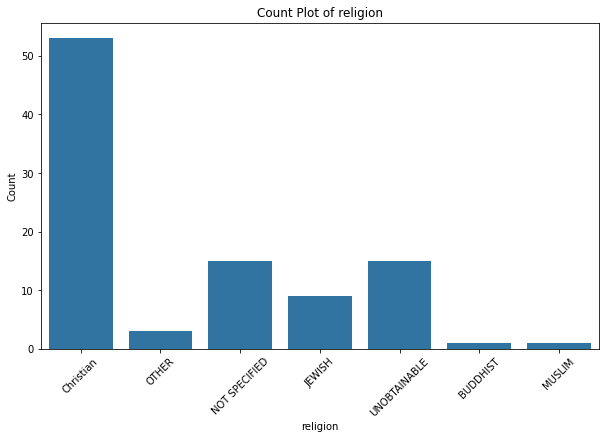

In [88]:
plot_count(all_patients_data, 'religion')

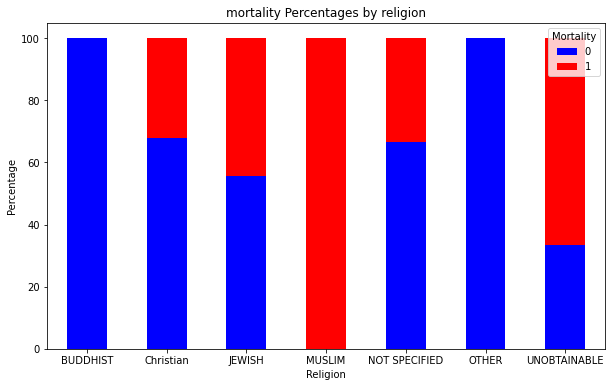

In [89]:
plot_by_category(all_patients_data, 'religion','mortality')

In [90]:
chi_square_test(all_patients_data, 'religion','mortality')

P-value: 0.10930642749594455
There is no statistically significant association between the two variables.


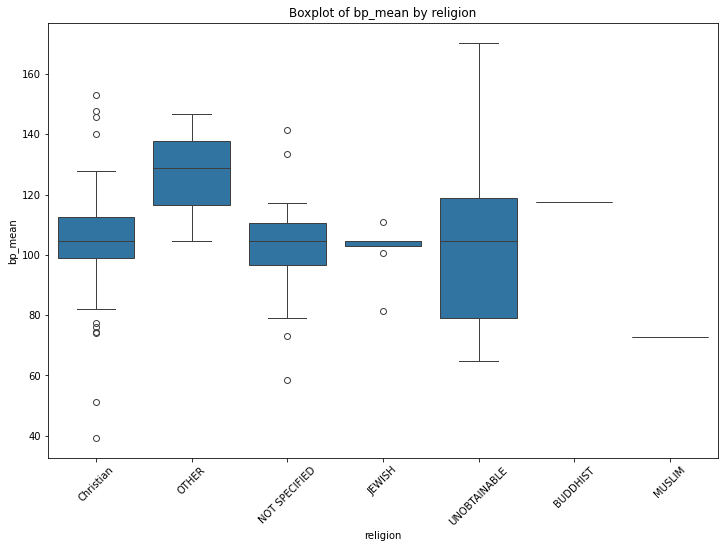

In [91]:
plot_numeric_vs_categorical(all_patients_data, 'bp_mean', 'religion')

In [92]:
Christian_patients_data = all_patients_data[all_patients_data['religion'] == 'Christian']
other_patients_data = all_patients_data[all_patients_data['religion'] != 'Christian']

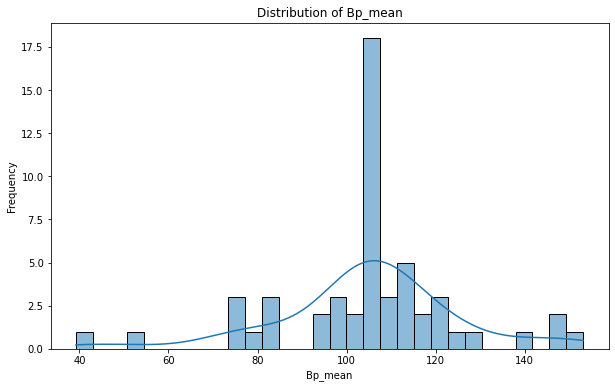

In [93]:
plot_histogram_with_kde(Christian_patients_data, 'bp_mean')

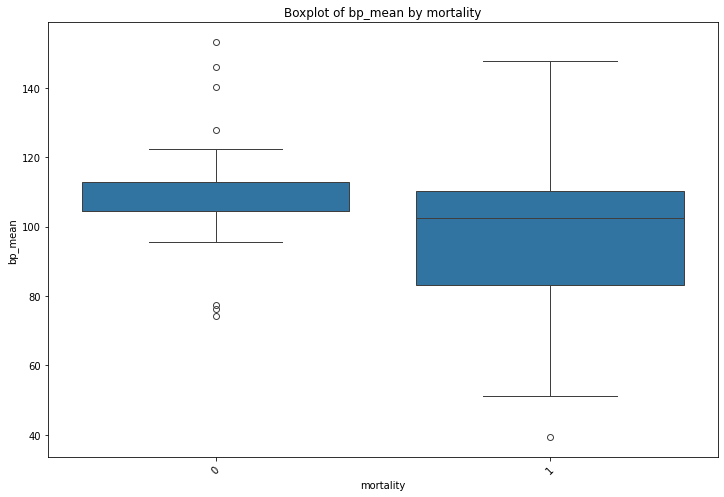

In [94]:
plot_numeric_vs_categorical(Christian_patients_data, 'bp_mean', 'mortality')

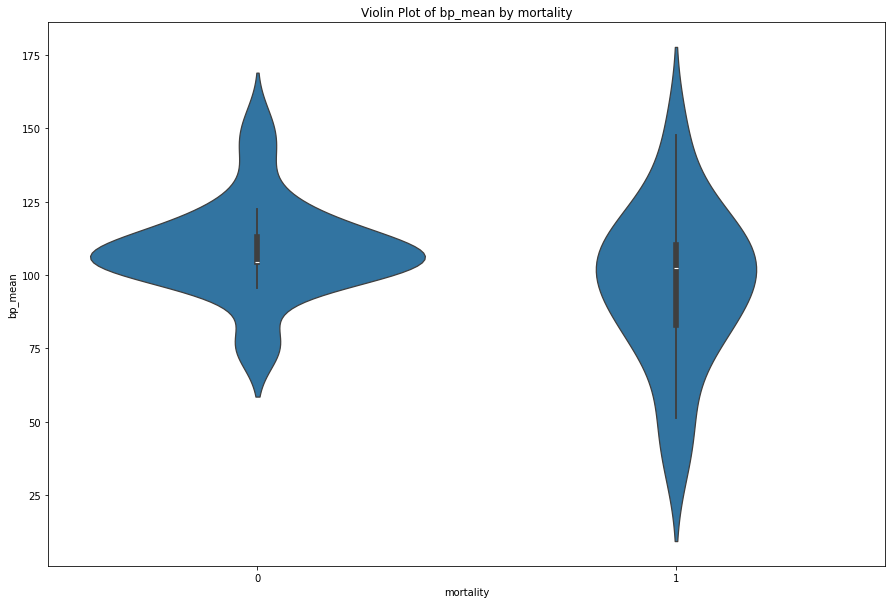

In [95]:
plot_violin(Christian_patients_data, 'mortality', 'bp_mean')

In [96]:
t_test_mortality_numeric(Christian_patients_data,'bp_mean')

P-value for bp_mean: 0.09169177035869414
The difference in values between those who died and those who lived is not statistically significant.


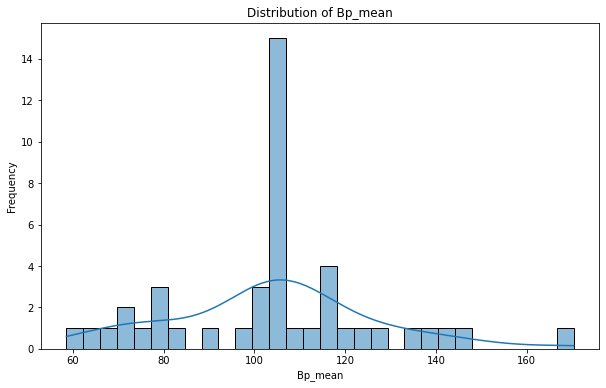

In [97]:
plot_histogram_with_kde(other_patients_data, 'bp_mean')

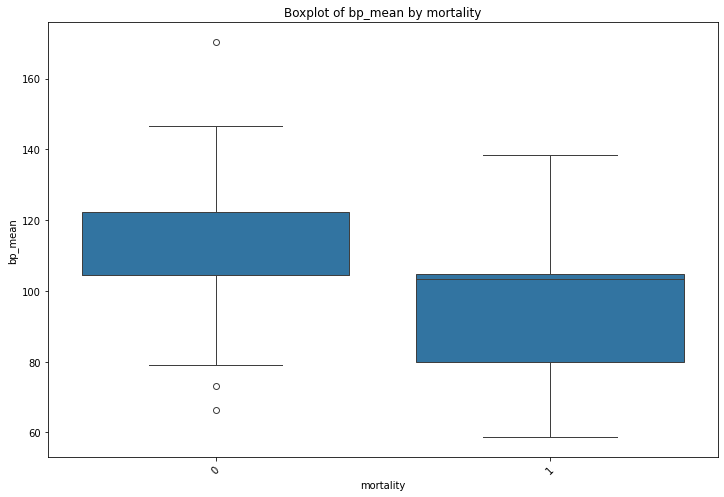

In [98]:
plot_numeric_vs_categorical(other_patients_data, 'bp_mean', 'mortality')

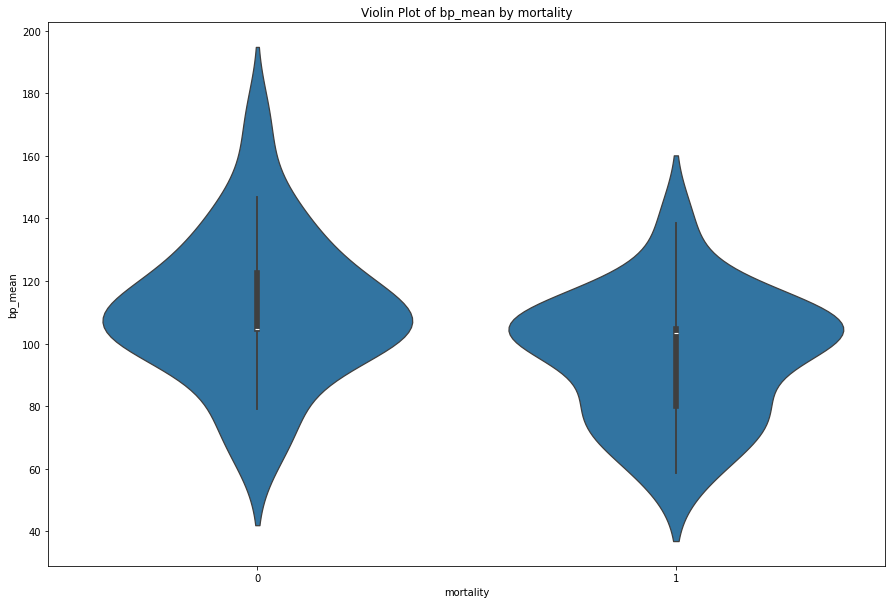

In [99]:
plot_violin(other_patients_data, 'mortality', 'bp_mean')

In [100]:
t_test_mortality_numeric(other_patients_data,'bp_mean')

P-value for bp_mean: 0.02674495920181425
The difference in values between those who died and those who lived is statistically significant.


---
> # Conclusion 1.5:
> #### **It can be seen that if the patient is not a Christian there is a relationship between his blood pressure and mortality.** We got this conclusion after combining all the data that were not defined as Christians to get a sharper picture (a chi square test defined that there is no relationship between religion and mortality before the union)
> #### Since in the previous conclusions we saw that men who were not infected with an immune bacterium have a direct relationship between blood pressure and mortality, we will also examine here whether the gender or the patient with the bacterium characterizes the relationship between blood pressure, mortality and religion.
---

In [101]:
female_patients_data = other_patients_data[other_patients_data['gender'] == 'F']
male_patients_data = other_patients_data[other_patients_data['gender'] == 'M']

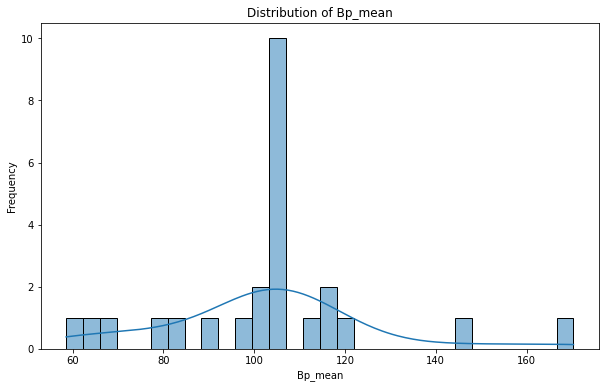

In [102]:
plot_histogram_with_kde(female_patients_data, 'bp_mean')

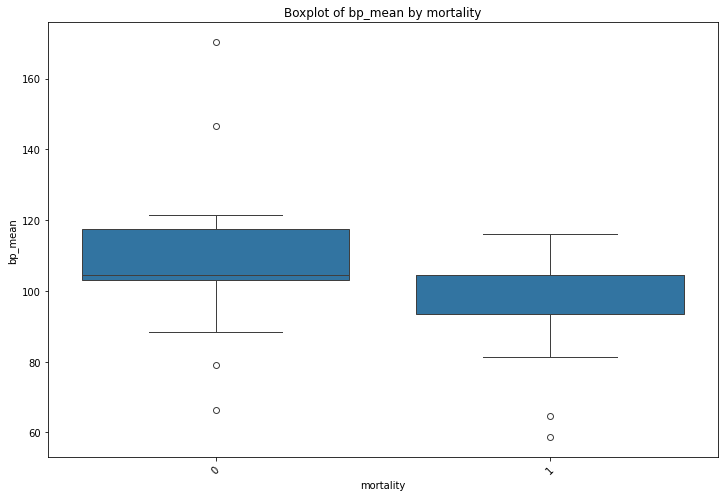

In [103]:
plot_numeric_vs_categorical(female_patients_data, 'bp_mean', 'mortality')

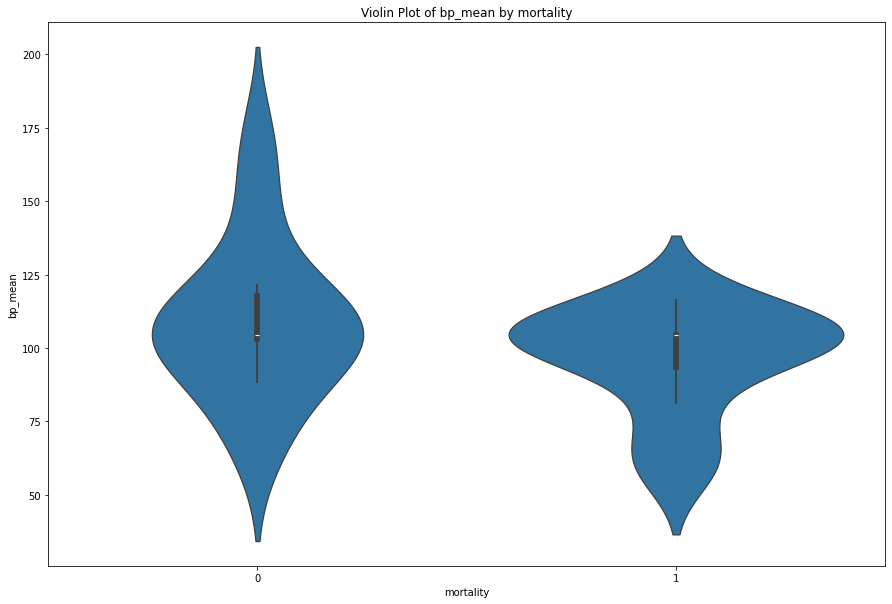

In [104]:
plot_violin(female_patients_data, 'mortality', 'bp_mean')

In [105]:
t_test_mortality_numeric(female_patients_data,'bp_mean')

P-value for bp_mean: 0.169391186497383
The difference in values between those who died and those who lived is not statistically significant.


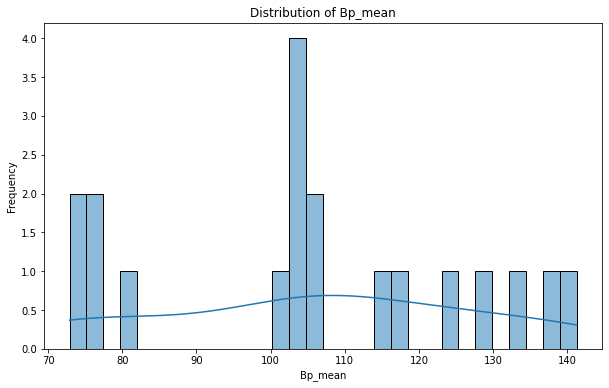

In [106]:
plot_histogram_with_kde(male_patients_data, 'bp_mean')

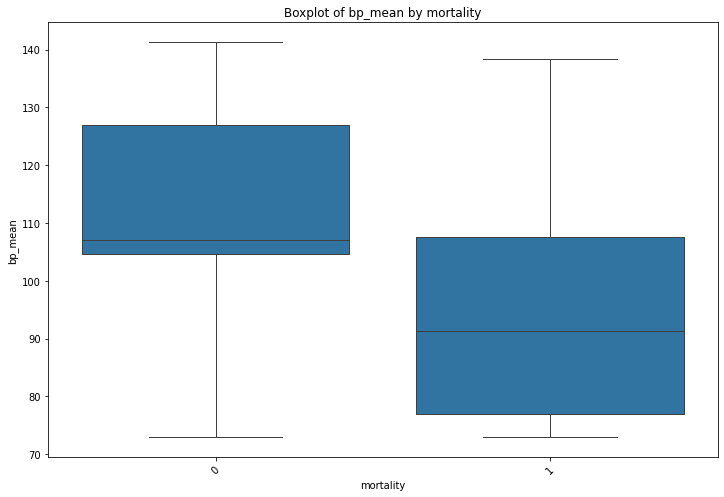

In [107]:
plot_numeric_vs_categorical(male_patients_data, 'bp_mean', 'mortality')

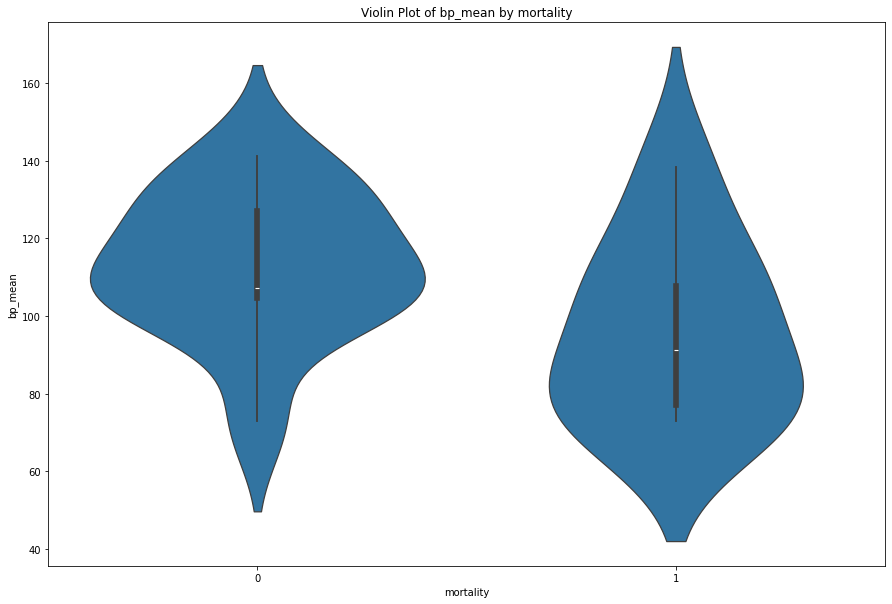

In [108]:
plot_violin(male_patients_data, 'mortality', 'bp_mean')

In [109]:
t_test_mortality_numeric(male_patients_data,'bp_mean')

P-value for bp_mean: 0.11153469250341146
The difference in values between those who died and those who lived is not statistically significant.


### Further to conclusion 1.5 it can be seen that **it is not possible to deepen the conclusion and characterize the relationship between religion, blood pressure and mortality also by gender.**

### We will examine the connection according to the is_infected column

In [110]:
infected_patients_data = other_patients_data[other_patients_data['is_infected'] == 1]
uninfected_patients_data = other_patients_data[other_patients_data['is_infected'] == 0]

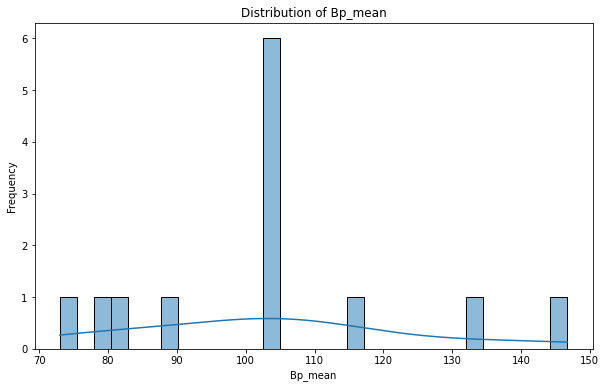

In [111]:
plot_histogram_with_kde(infected_patients_data, 'bp_mean')

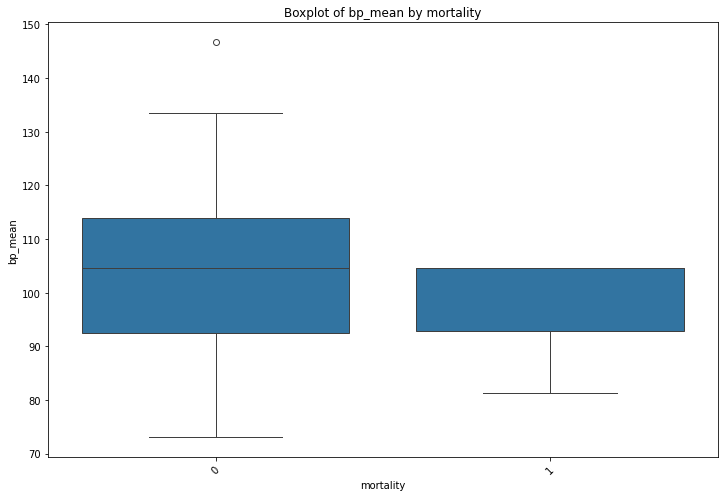

In [112]:
plot_numeric_vs_categorical(infected_patients_data, 'bp_mean', 'mortality')

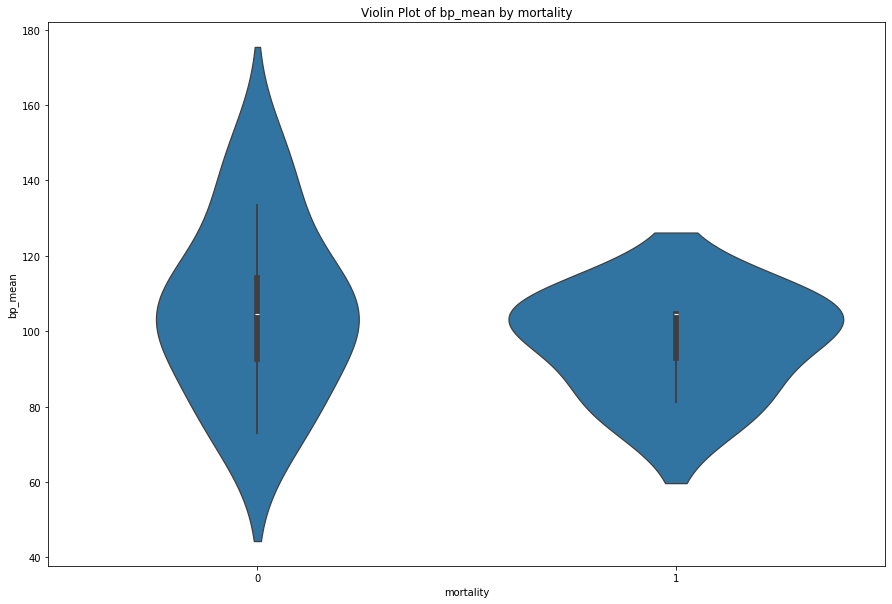

In [113]:
plot_violin(infected_patients_data, 'mortality', 'bp_mean')

In [114]:
t_test_mortality_numeric(infected_patients_data,'bp_mean')

P-value for bp_mean: 0.43723183289872875
The difference in values between those who died and those who lived is not statistically significant.


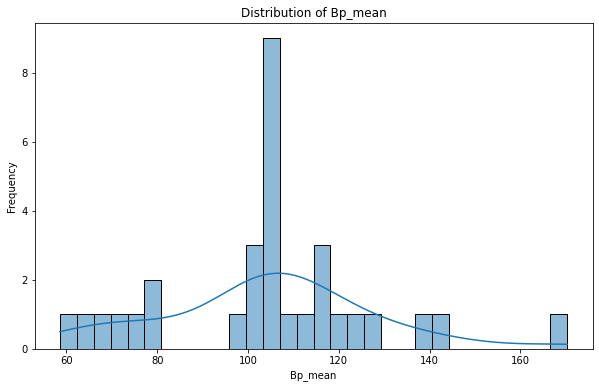

In [115]:
plot_histogram_with_kde(uninfected_patients_data, 'bp_mean')

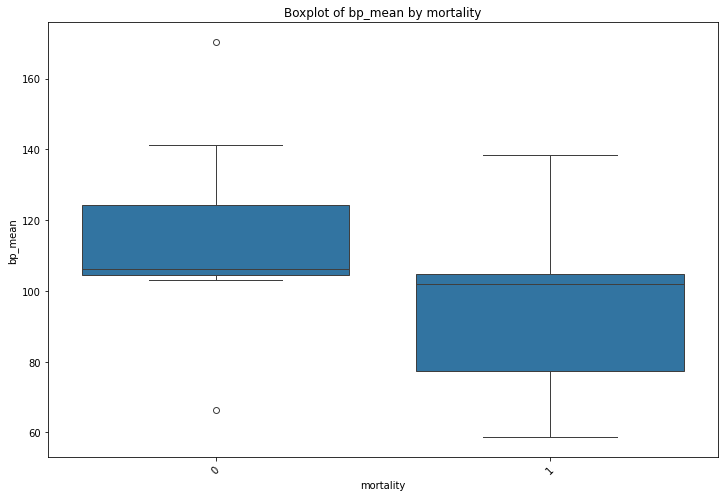

In [116]:
plot_numeric_vs_categorical(uninfected_patients_data, 'bp_mean', 'mortality')

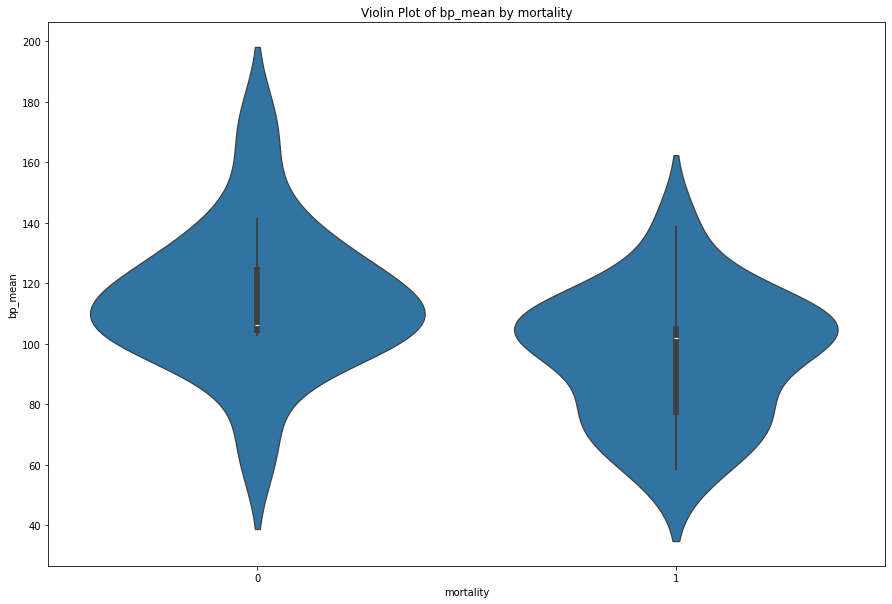

In [117]:
plot_violin(uninfected_patients_data, 'mortality', 'bp_mean')

In [118]:
t_test_mortality_numeric(uninfected_patients_data,'bp_mean')

P-value for bp_mean: 0.028463263188253055
The difference in values between those who died and those who lived is statistically significant.


---
> # Conclusion 1.5.2:
> #### Further to conclusion 1.5 (for patients whose religion is not Christian, there is a relationship between blood pressure and mortality) and conclusions 1.4-1.4.3 (if the patient is a man who is not infected with an immune bacterium, there is a relationship between blood pressure and mortality) we were able to prove that **if the patient is not Infected with an immune bacterium and it is not a Christian. There is a statistically significant relationship between mortality and blood pressure**
---

## <blockquote> ethnicity </blockquote>

In [119]:
all_patients_data['ethnicity'].value_counts()

WHITE                                                       74
UNKNOWN/NOT SPECIFIED                                        8
BLACK/AFRICAN AMERICAN                                       6
ASIAN                                                        2
OTHER                                                        2
HISPANIC OR LATINO                                           2
HISPANIC/LATINO - PUERTO RICAN                               1
UNABLE TO OBTAIN                                             1
AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE     1
Name: ethnicity, dtype: int64

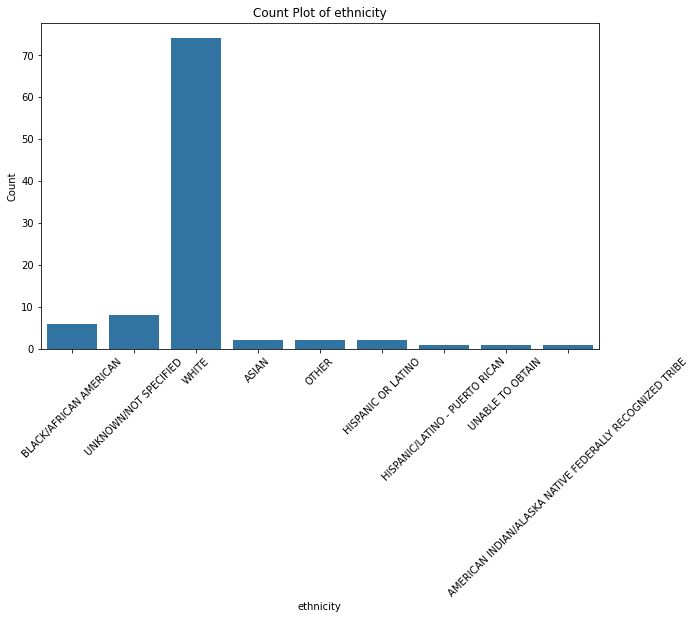

In [120]:
plot_count(all_patients_data, 'ethnicity')

In [121]:
pattern = r'^(?!WHITE$).*$'
all_patients_data['ethnicity'] = all_patients_data['ethnicity'].replace(pattern, 'Other', regex=True)

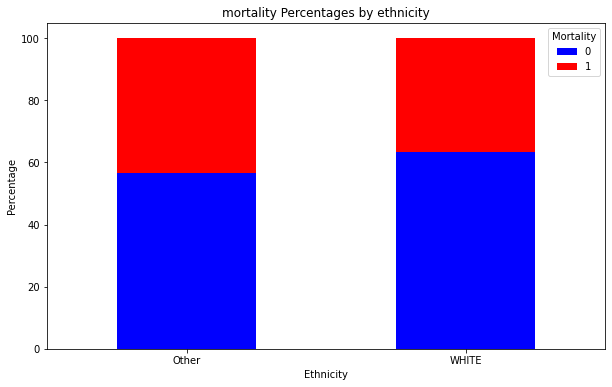

In [122]:
plot_by_category(all_patients_data, 'ethnicity','mortality')


In [123]:
chi_square_test(all_patients_data, 'ethnicity','mortality')

P-value: 0.7209376105421567
There is no statistically significant association between the two variables.


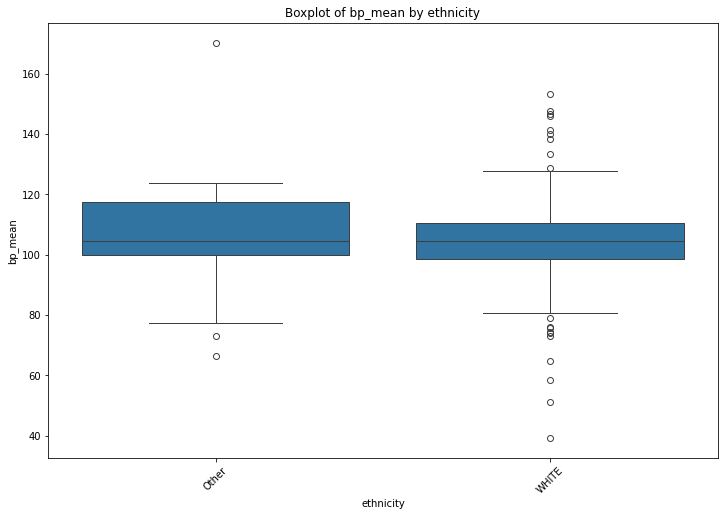

In [124]:
plot_numeric_vs_categorical(all_patients_data, 'bp_mean', 'ethnicity')

In [125]:
WHITE_patients_data = all_patients_data[all_patients_data['ethnicity'] == 'WHITE']
other_patients_data = all_patients_data[all_patients_data['ethnicity'] != 'WHITE']

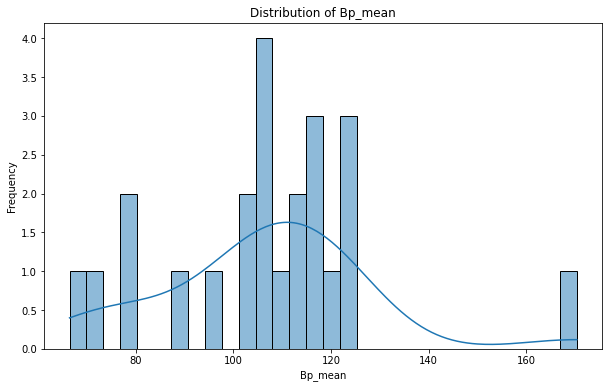

In [126]:
plot_histogram_with_kde(other_patients_data, 'bp_mean')


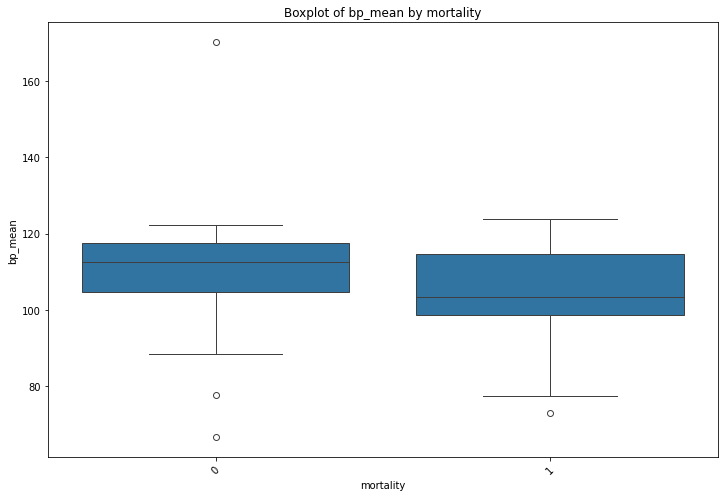

In [127]:
plot_numeric_vs_categorical(other_patients_data, 'bp_mean', 'mortality')

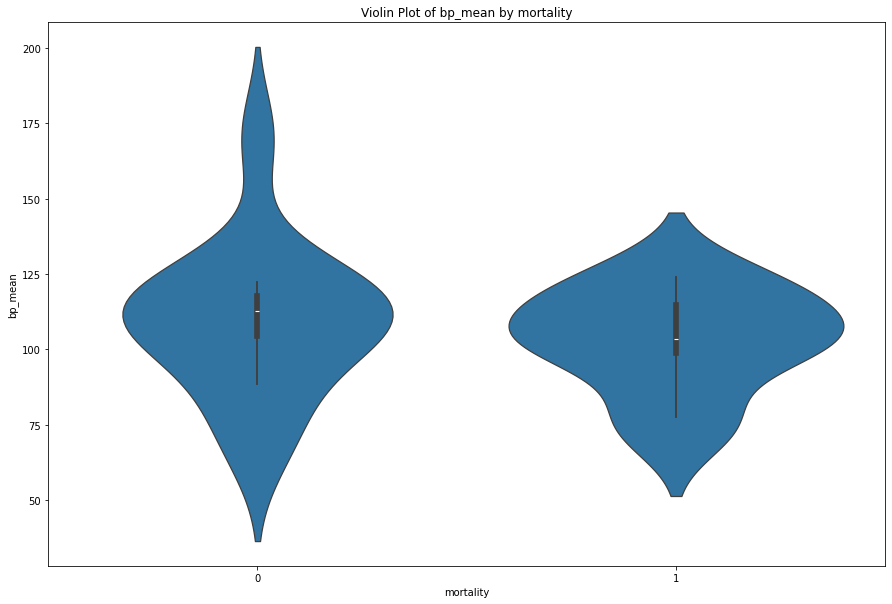

In [128]:
plot_violin(other_patients_data, 'mortality', 'bp_mean')

In [129]:
t_test_mortality_numeric(other_patients_data,'bp_mean')

P-value for bp_mean: 0.4806832761094202
The difference in values between those who died and those who lived is not statistically significant.


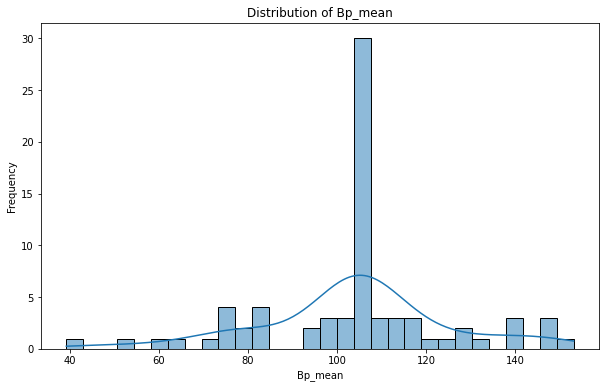

In [130]:
plot_histogram_with_kde(WHITE_patients_data, 'bp_mean')

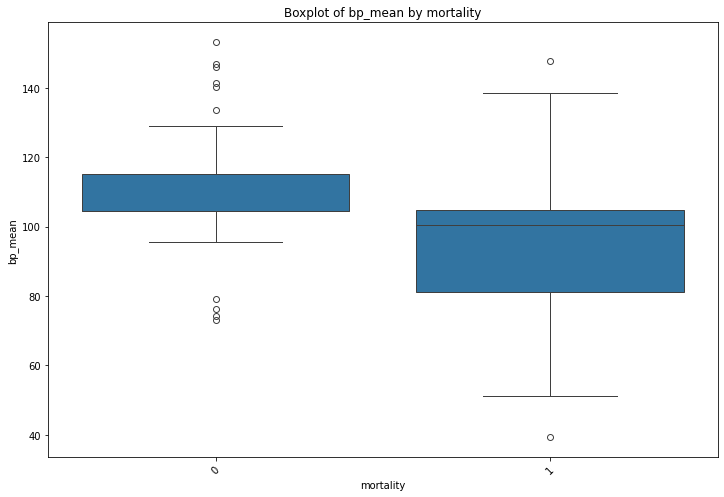

In [131]:
plot_numeric_vs_categorical(WHITE_patients_data, 'bp_mean', 'mortality')

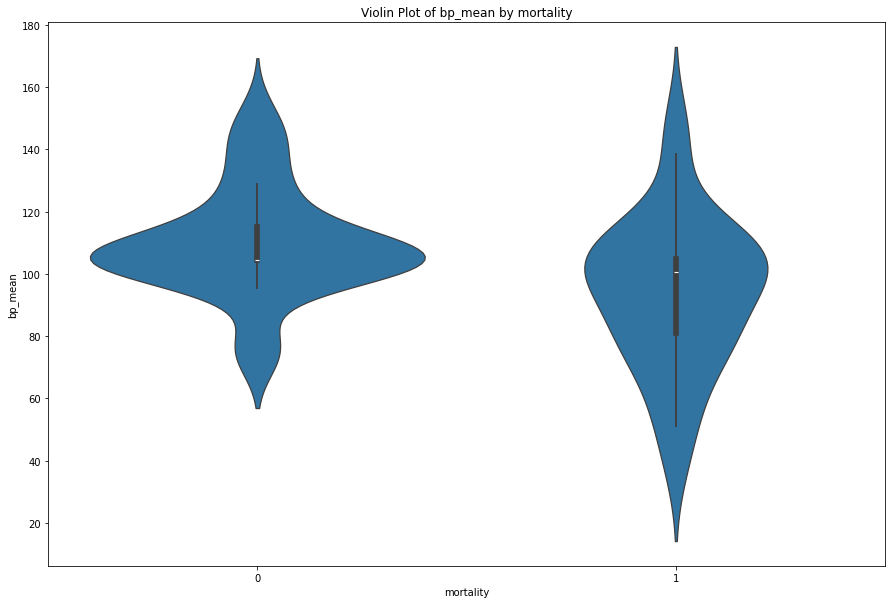

In [132]:
plot_violin(WHITE_patients_data, 'mortality', 'bp_mean')

In [133]:
t_test_mortality_numeric(WHITE_patients_data,'bp_mean')

P-value for bp_mean: 0.004625126989197819
The difference in values between those who died and those who lived is statistically significant.


---
> # Conclusion 1.6:
> #### **we can see that if the patient's ethnicity is white there is a relationship between his blood pressure and mortality.** We got this conclusion after combining all the data that was not defined as white to get a sharper picture (a chi-square test defined that there is no relationship between religion and mortality before the union)
> #### Since in the previous conclusions we saw that Christian men who were not infected with an immune bacterium have a direct relationship between blood pressure and mortality, we will also examine here whether the gender or the patient with the bacterium characterizes the relationship between blood pressure,ethnicity, mortality and religion.
---

In [134]:
female_patients_data = WHITE_patients_data[WHITE_patients_data['gender'] == 'F']
male_patients_data = WHITE_patients_data[WHITE_patients_data['gender'] == 'M']

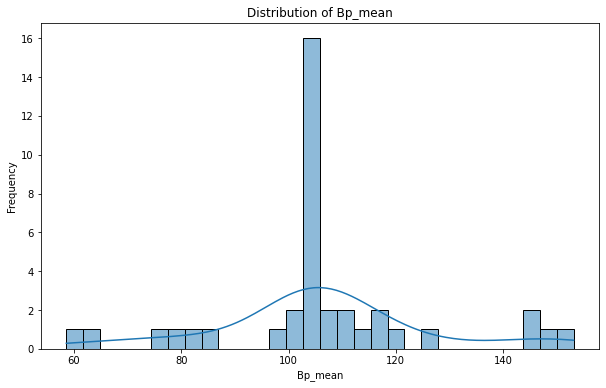

In [135]:
plot_histogram_with_kde(female_patients_data, 'bp_mean')

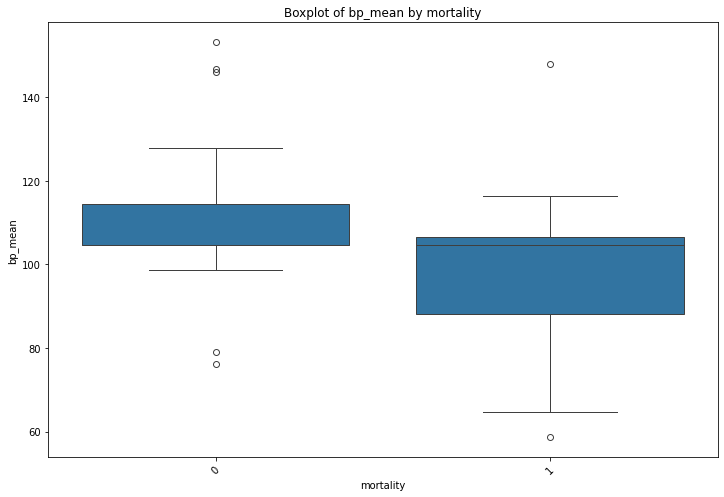

In [136]:
plot_numeric_vs_categorical(female_patients_data, 'bp_mean', 'mortality')


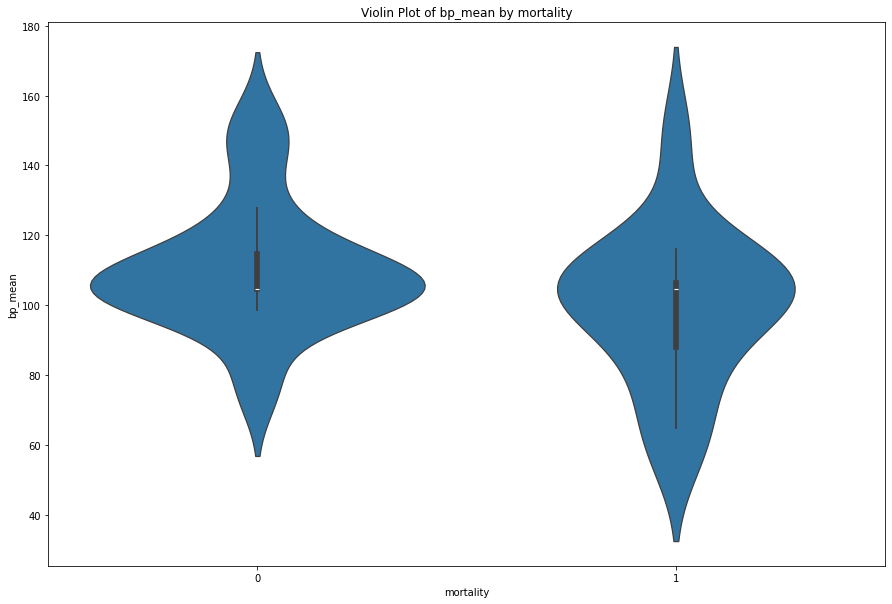

In [137]:
plot_violin(female_patients_data, 'mortality', 'bp_mean')


In [138]:
t_test_mortality_numeric(female_patients_data,'bp_mean')

P-value for bp_mean: 0.13716715064620777
The difference in values between those who died and those who lived is not statistically significant.


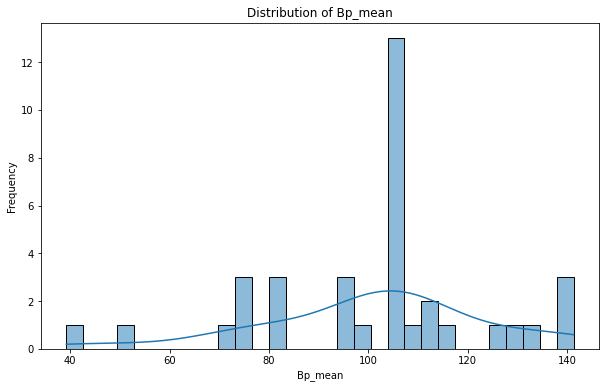

In [139]:
plot_histogram_with_kde(male_patients_data, 'bp_mean')

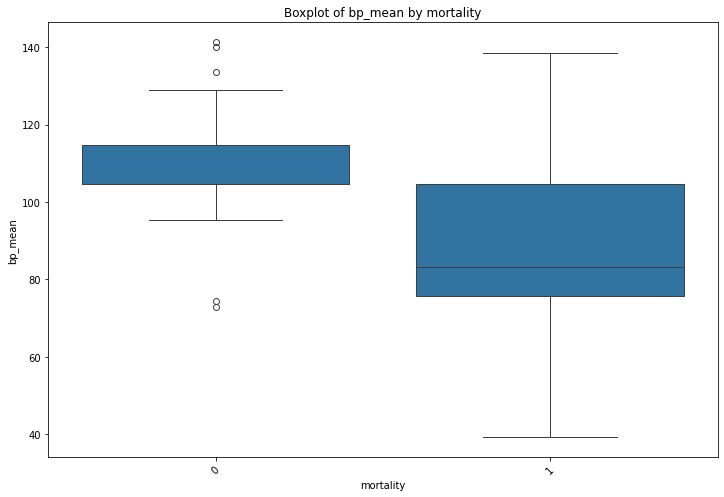

In [140]:
plot_numeric_vs_categorical(male_patients_data, 'bp_mean', 'mortality')


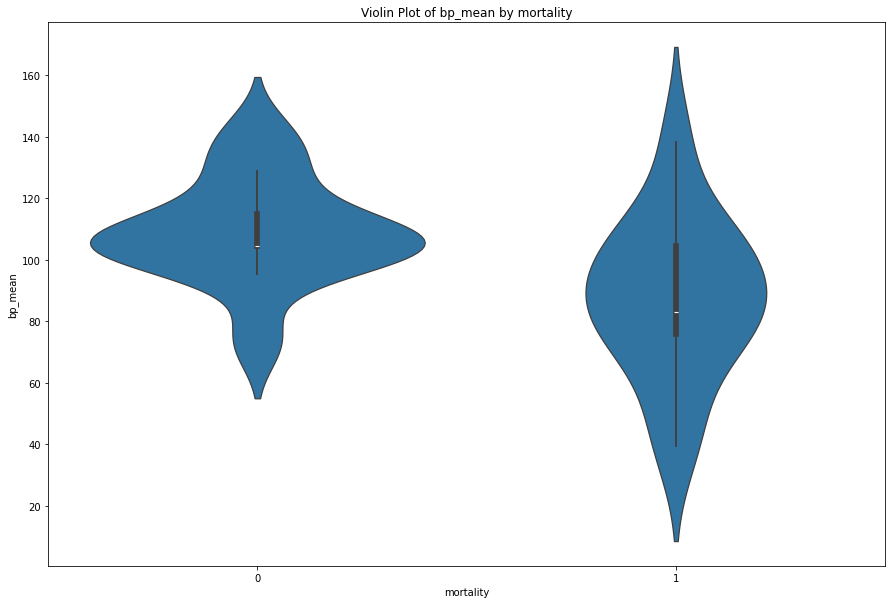

In [141]:
plot_violin(male_patients_data, 'mortality', 'bp_mean')


In [142]:
t_test_mortality_numeric(male_patients_data,'bp_mean')

P-value for bp_mean: 0.014646389694175848
The difference in values between those who died and those who lived is statistically significant.


---
> # Conclusion 1.6.2:
> #### **It can be seen that if the patient is male and the ethnicity of the patient is white, there is a relationship between his blood pressure and mortality.**
> #### This conclusion reinforces the previous conclusions that **men with certain characteristics have a statistically significant relationship between mortality and blood pressure**.
---

## <blockquote> list_of_lables </blockquote>

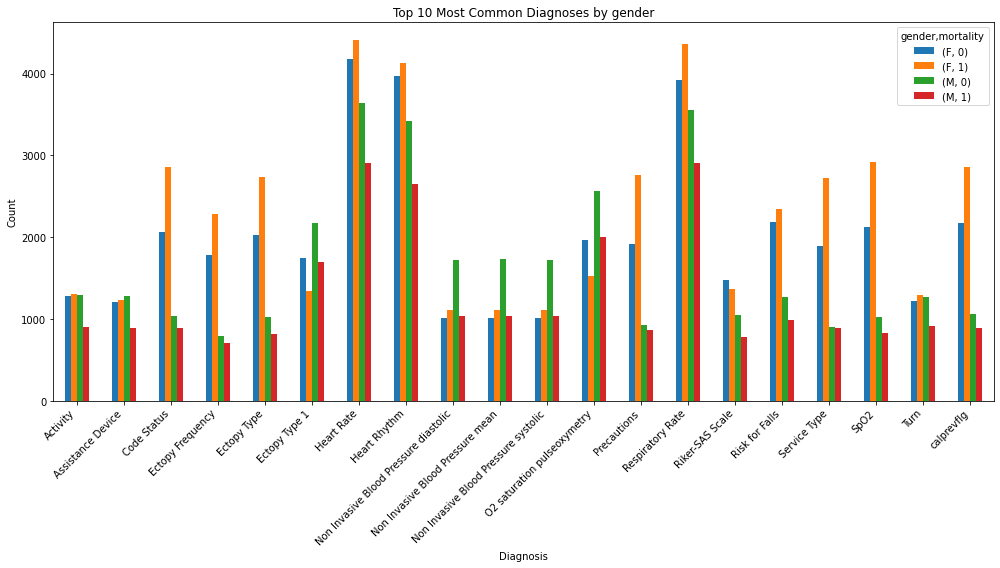

In [153]:
plot_top_10_diagnoses_by_category(all_patients_data, 'gender')

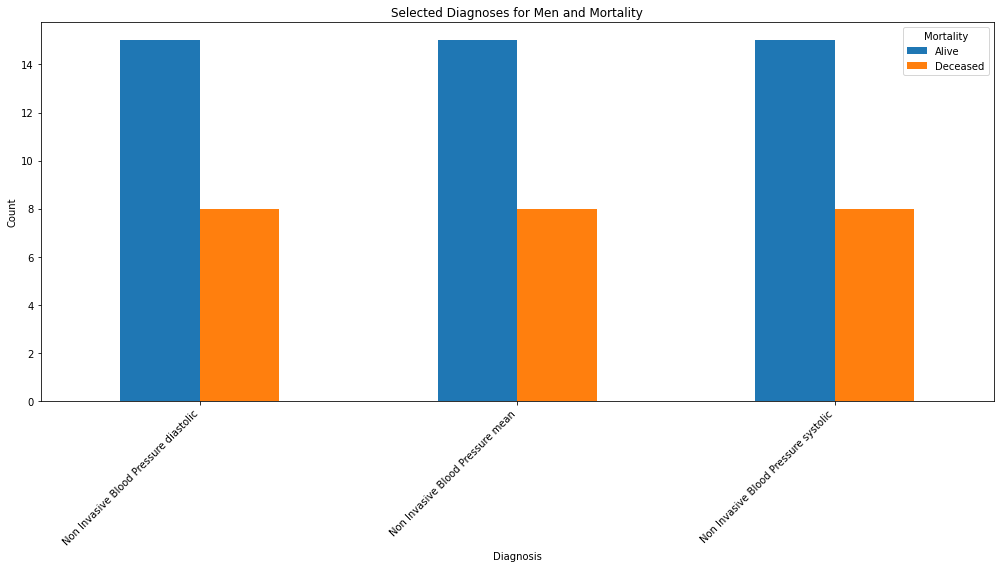

In [179]:
plot_selected_diagnoses_for_men(all_patients_data, 'gender')

---
> # Conclusion 1.7:
> #### The claim that the average blood pressure has a significant impact on the mortality of male patients in the intensive care unit is strengthened by the observation that there is a discernible difference in the blood pressure tests between the males (gender = "M") who survived (mortality = 0) and the males who did not.
---

# -----------------------------------------------------------------------------------------------------------------------------------------------------
# **Final Conclusions:**
> ### We saw that **there is a direct effect between mortality and the infection status of the patient with an immune bacterium (according to the chi square test), patients infected with the bacterium tend to survive longer in the intensive care unit.**

> ### We examined all the numerical variables against mortality and saw that only **blood pressure has a significant relationship with mortality** (according to the T test).

> ## When we deepened the relationship, we saw some conclusions:
> ### **The relationship between blood pressure and mortality is significant if the patient is male** (according to the gender column).
> ### **The relationship between blood pressure and mortality is significant if the patient is not infected with an immune bacterium and his gender is male (according to the is_infected and gender columns).**
> ### **The relationship between blood pressure and mortality is significant for patients who are not Christians and who are not sick with an immune bacterium (according to the is_infected and religion columns)**
> ### **The relationship between blood pressure and mortality is significant for male patients whose ethnicity is white (according to the ethnicity and gender columns)**
# -----------------------------------------------------------------------------------------------------------------------------------------------------
